In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data', 'segmentAnything','full-resizedBlurred')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/SSD/hbmv/hierarchical-bayesian-model-validation/raw-data/segmentAnything/full-resizedBlurred'

In [3]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df


In [4]:
def npz_opener_pickle(path):
    image = Image.open(path).convert('RGB')
    return np.array(image)

# Red Wavelet

In [5]:
red_wv = convert_to_wavelet_basis(data_dir, "red", debug=True, image_opener = npz_opener_pickle)
red_wv.head()

10 layers being used


100%|██████████| 276/276 [00:03<00:00, 91.95it/s] 


channel  layer  frequency orientation  \
0     red      1   0.099611          L1   
1     red      2   0.110679           D   
2     red      2   0.110679           H   
3     red      2   0.110679           V   
4     red      3   0.124514           D   

                                                data  
0  [66981.18164062509, 53158.035156250065, 89715....  
1  [4121.6464843750055, 555.5195312500031, 3105.1...  
2  [2916.548828125001, -2862.7187500000064, 924.2...  
3  [4608.537109375004, -14710.10156250001, -540.9...  
4  [5286.628906250006, -159.2343749999992, -738.5...

In [6]:
red_wv['data'][20].shape

(1130496,)

In [7]:
red_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 9):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    red_df = pd.concat([red_df, ks_df], axis = 0)
red_df

/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_1447/1668664979.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  red_df = pd.concat([red_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.105072   9.497497e-02
2     2     H      V  0.134058   1.394121e-02
0     2     D      H  0.173913   4.610795e-04
2     3     H      V  0.093297   1.328787e-04
1     3     D      V  0.114130   1.108928e-06
0     3     D      H  0.182971   1.465717e-16
2     4     H      V  0.072464   1.670108e-10
1     4     D      V  0.078351   3.286555e-12
0     4     D      H  0.148324   9.057821e-43
2     5     H      V  0.038327   1.041987e-11
1     5     D      V  0.086107   2.014471e-57
0     5     D      H  0.114187  8.992117e-101
2     6     H      V  0.035963   3.915480e-40
1     6     D      V  0.077304  4.582331e-184
0     6     D      H  0.108795   0.000000e+00
2     7     H      V  0.032265  3.022046e-128
1     7     D      V  0.073532   0.000000e+00
0     7     D      H  0.103257   0.000000e+00
2     8     H      V  0.028097   0.000000e+00
1     8     D      V  0.070463   0.000000e+00
0     8     D      H  0.098281   0.000000e+00

In [25]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    print(len(data[0]))

276
1104
4416
17664
70656
282624
1130496


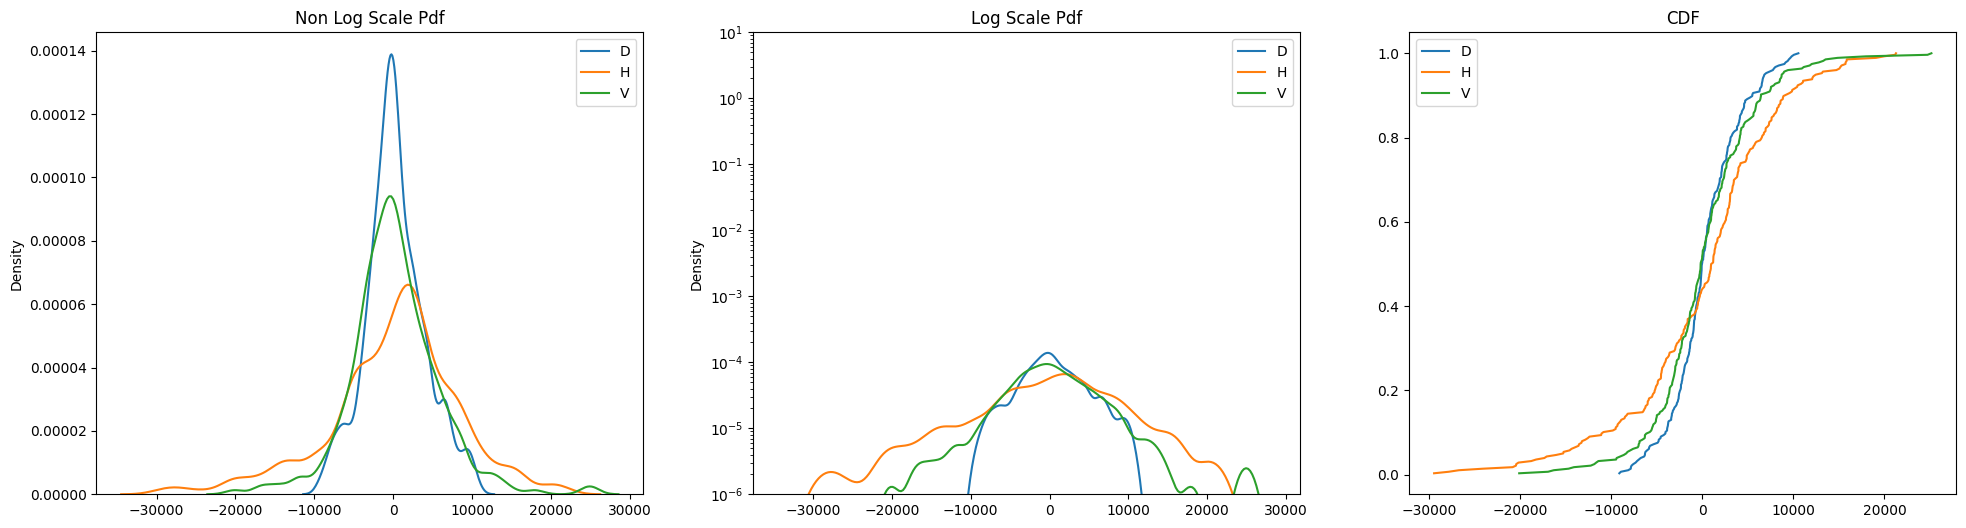

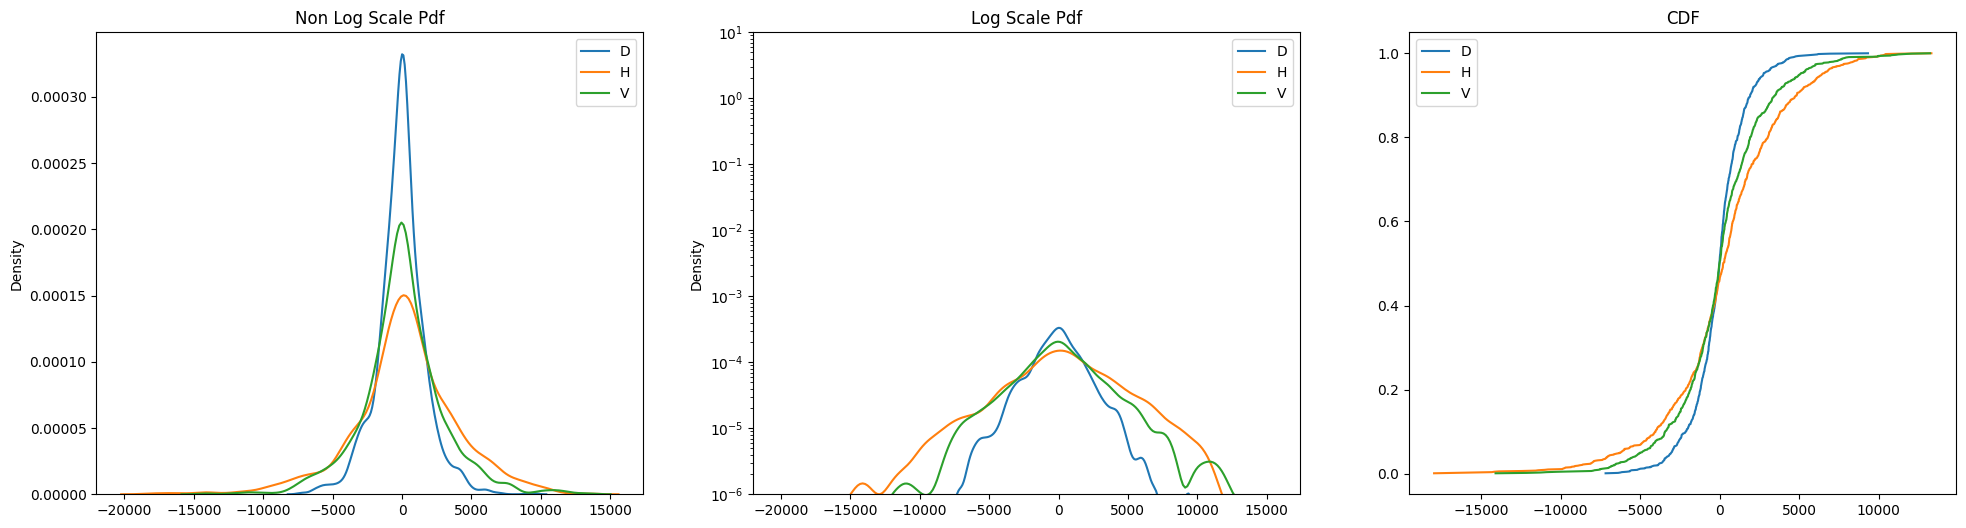

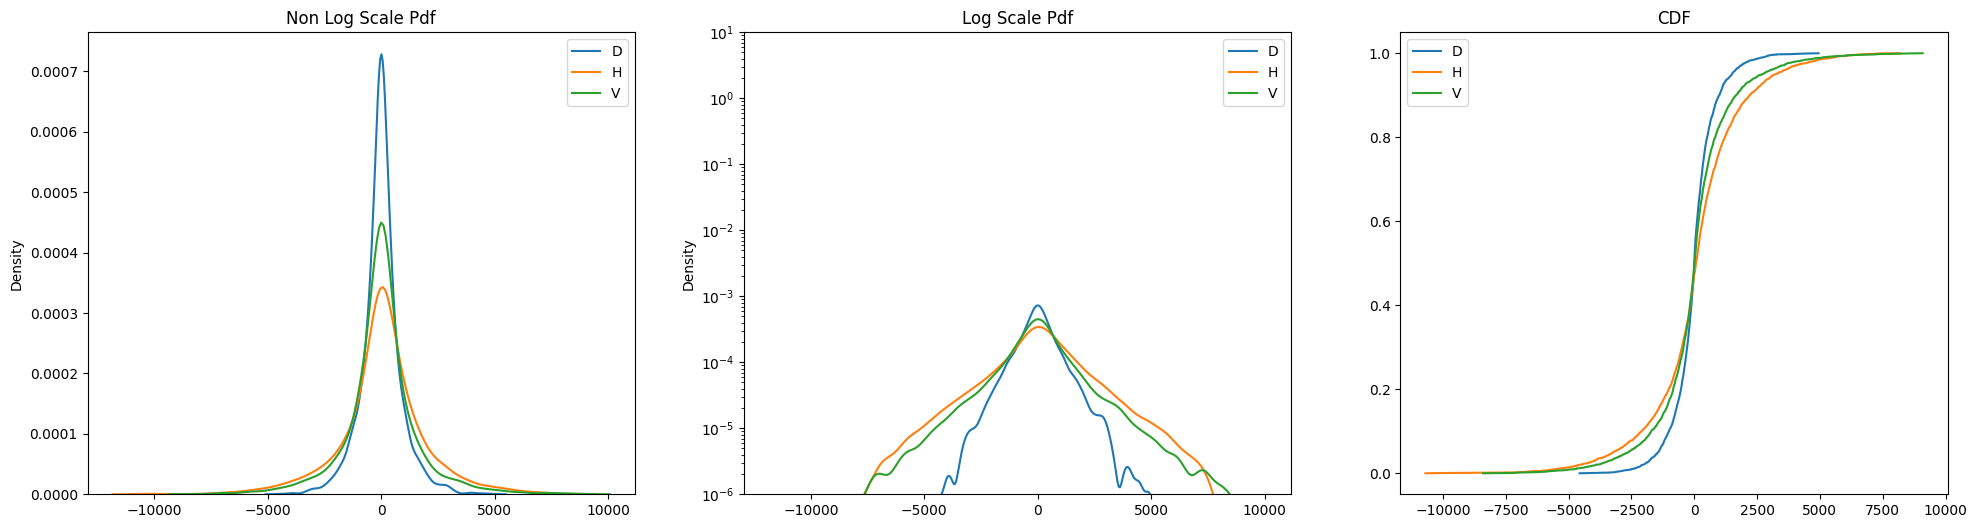

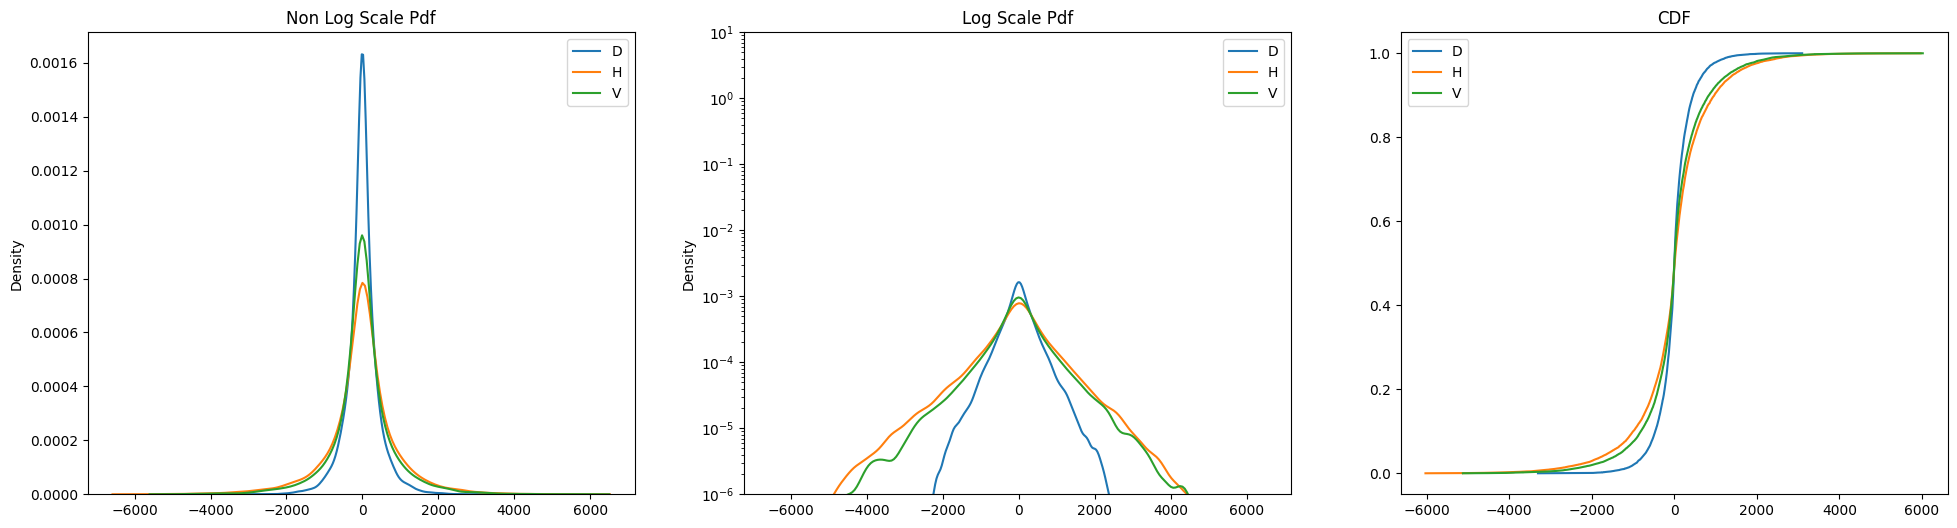

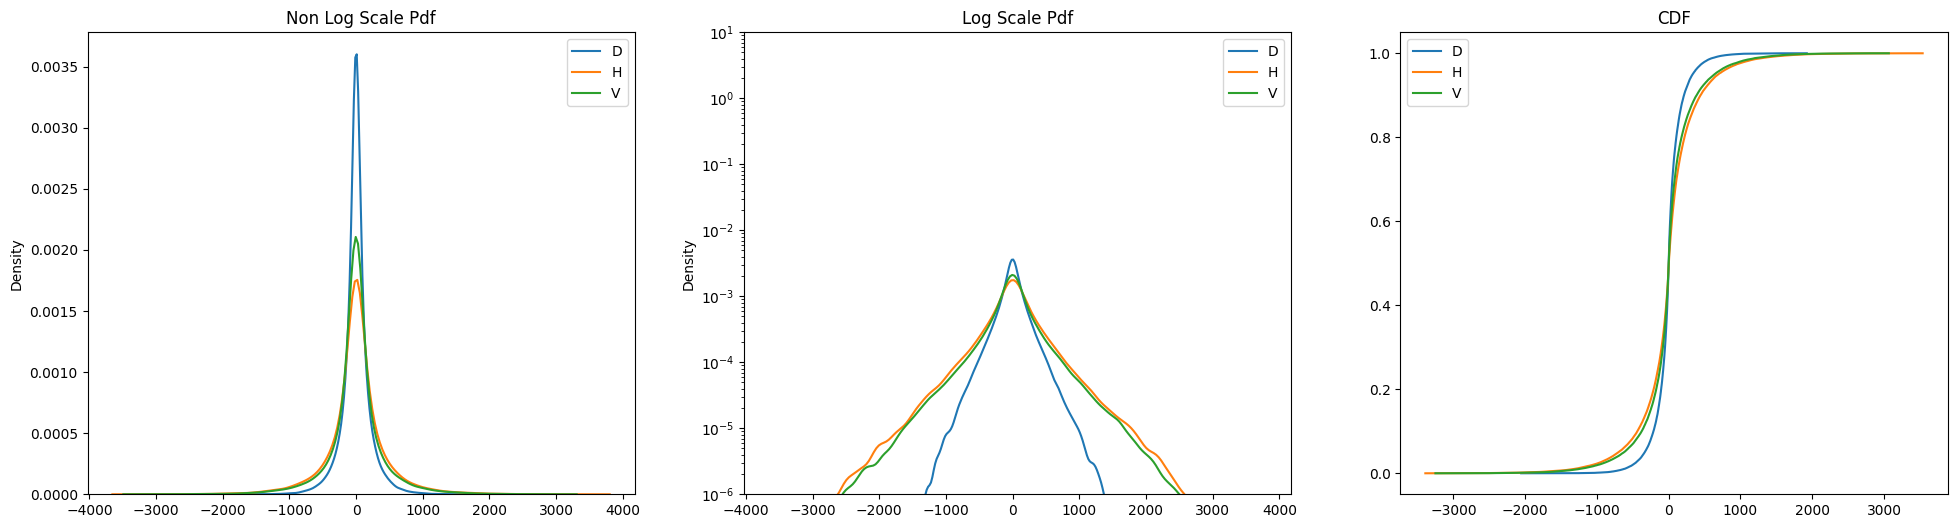

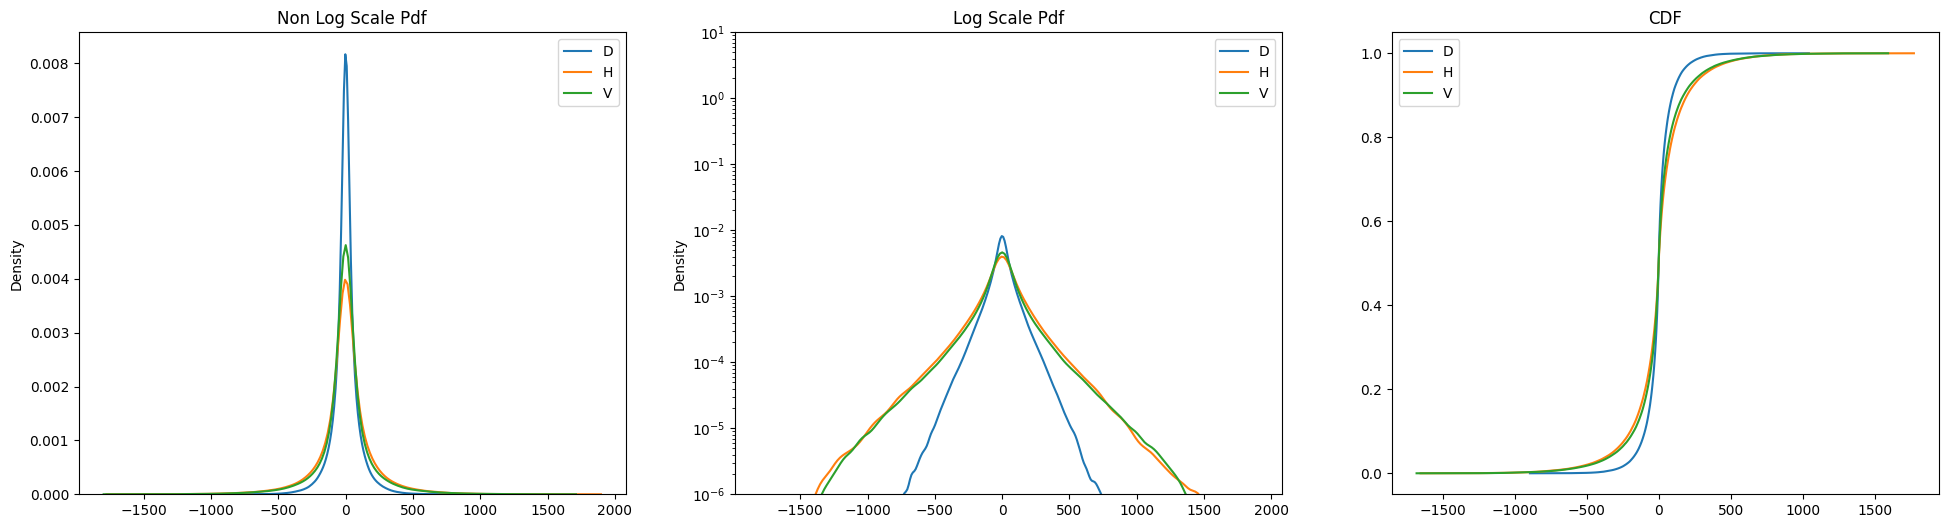

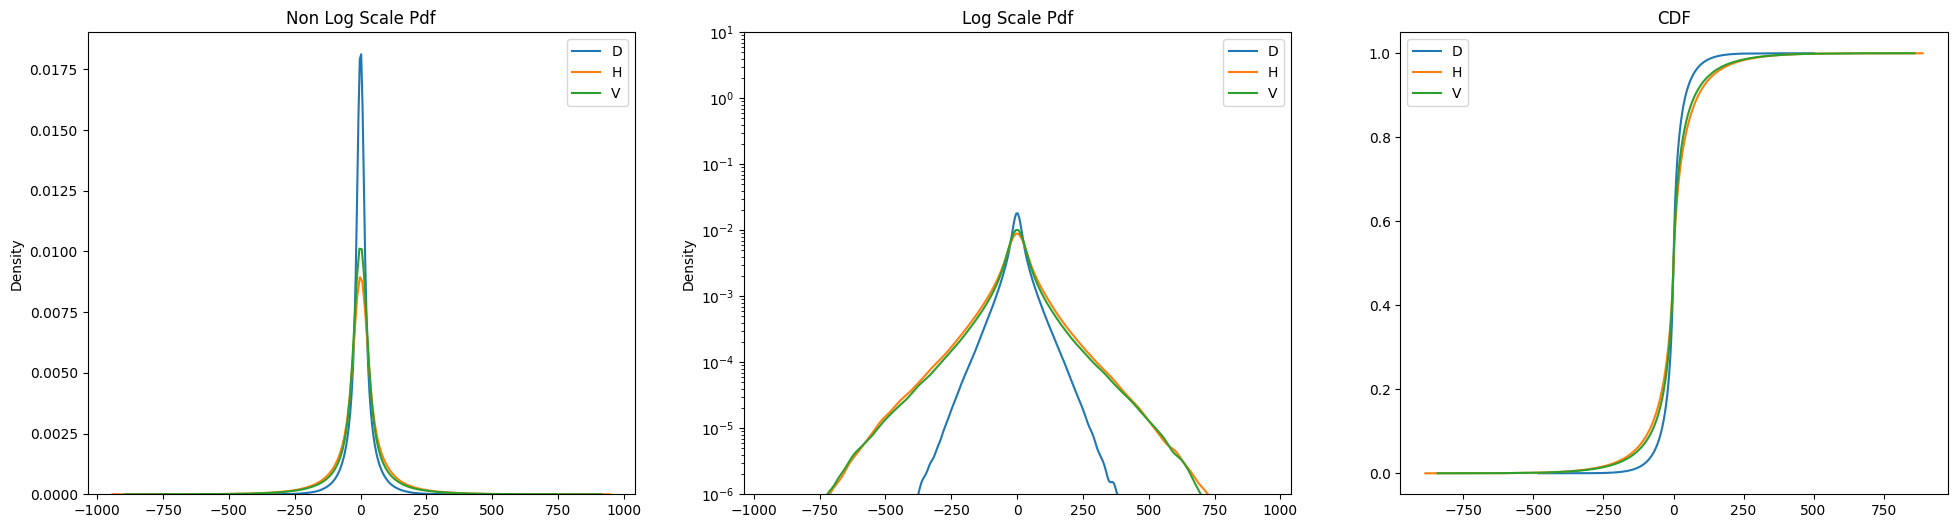

In [8]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


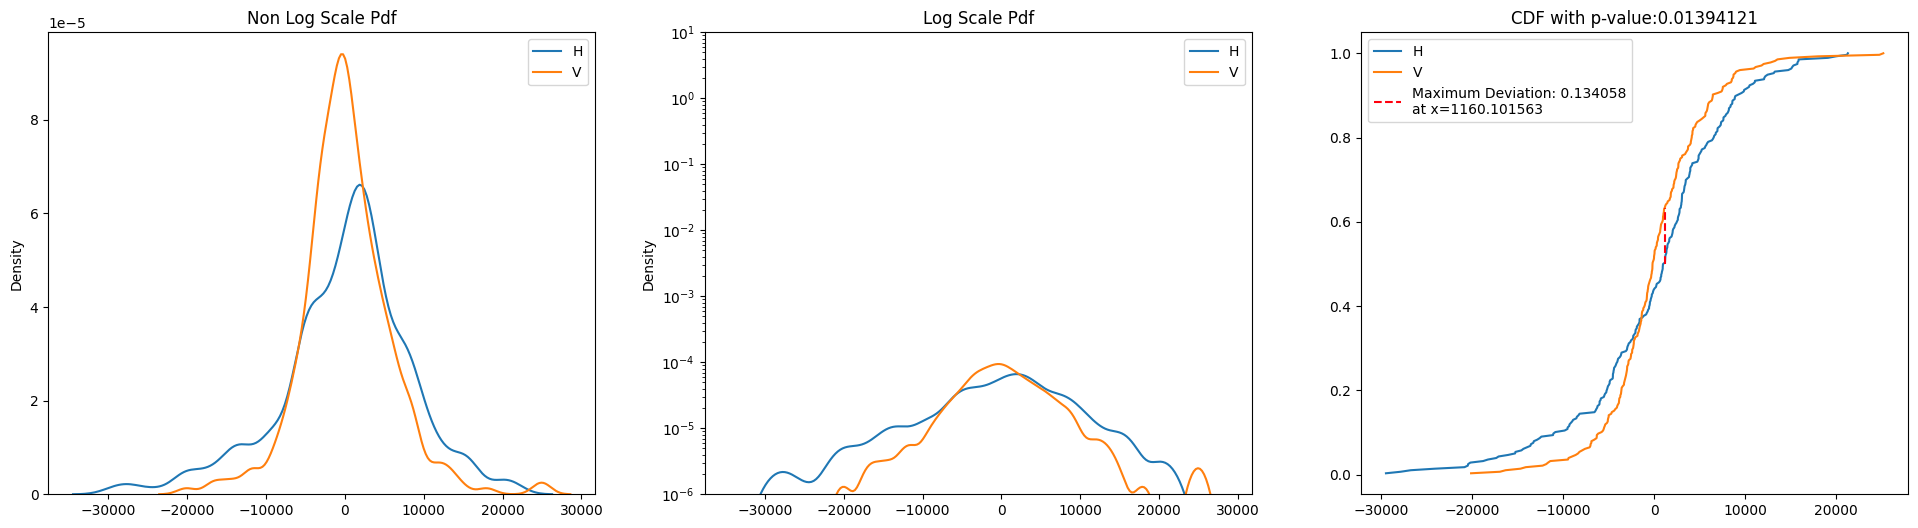

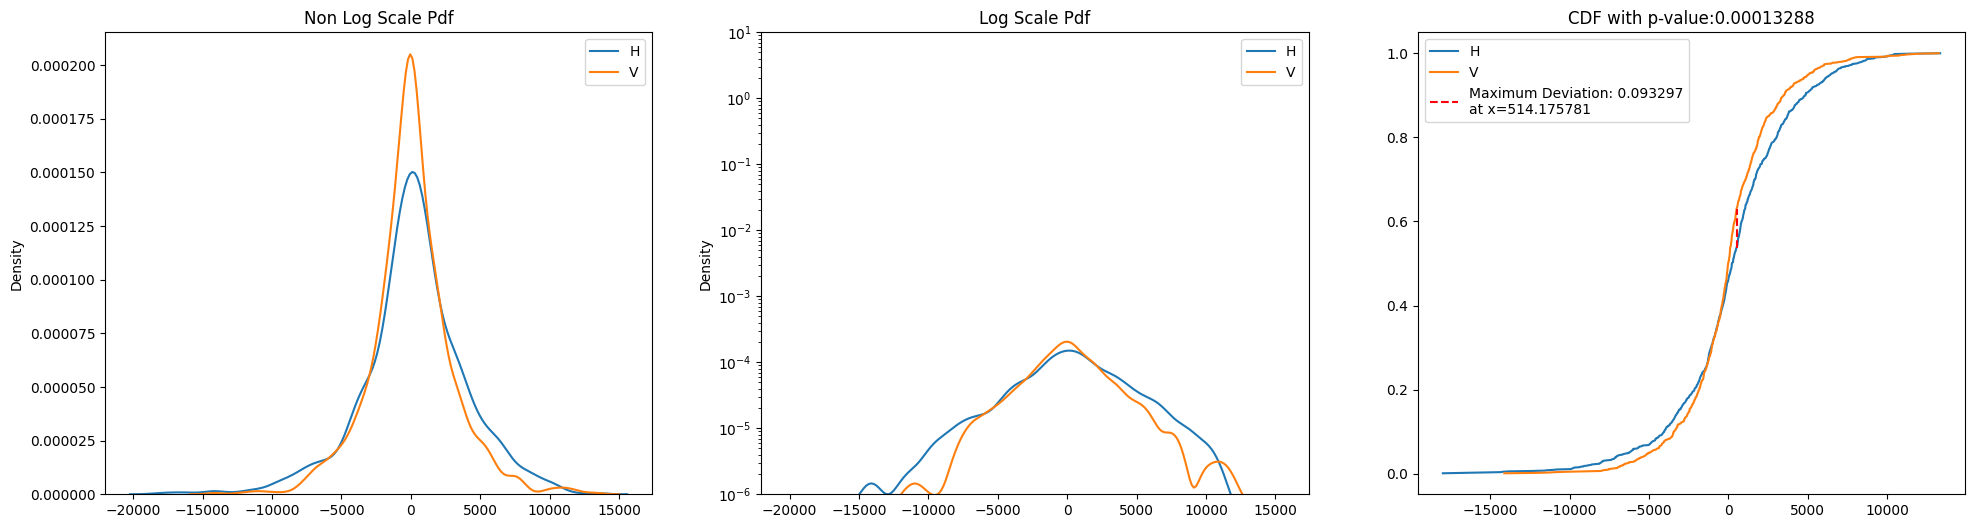

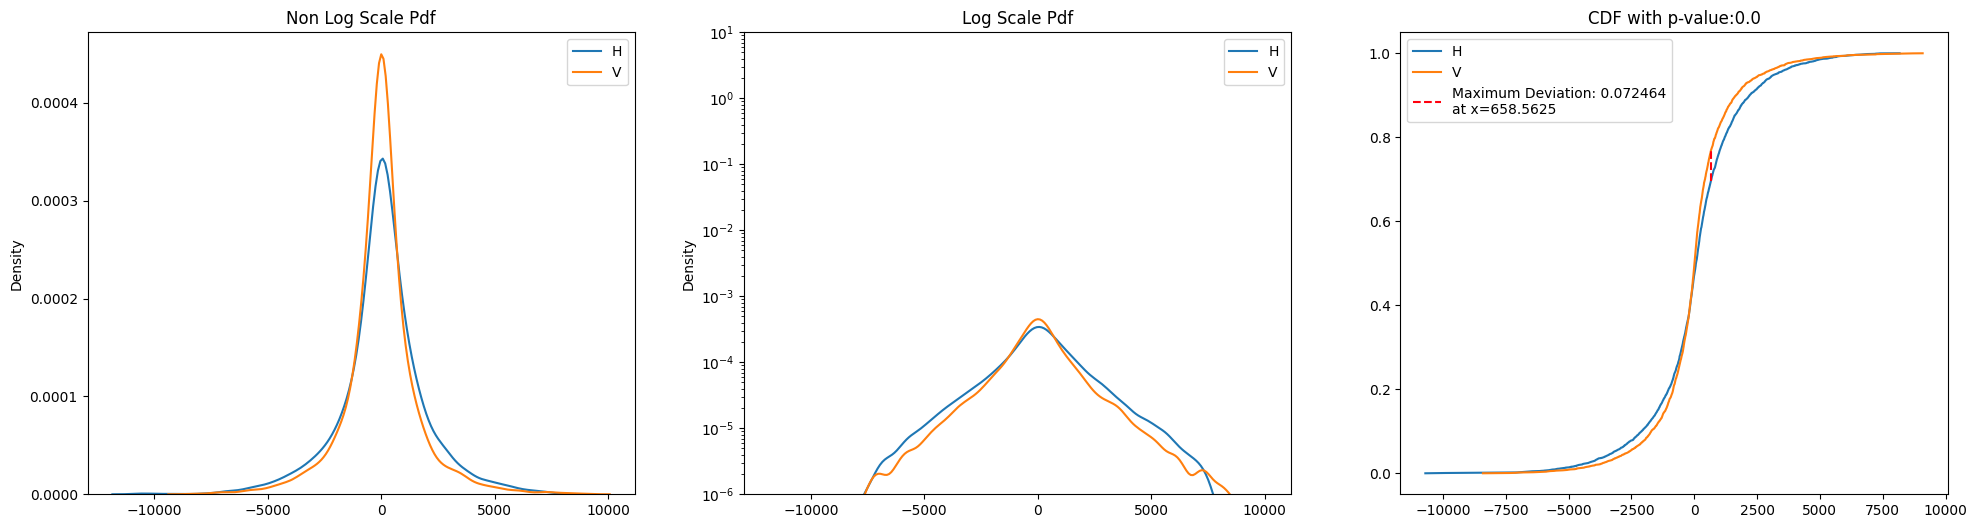

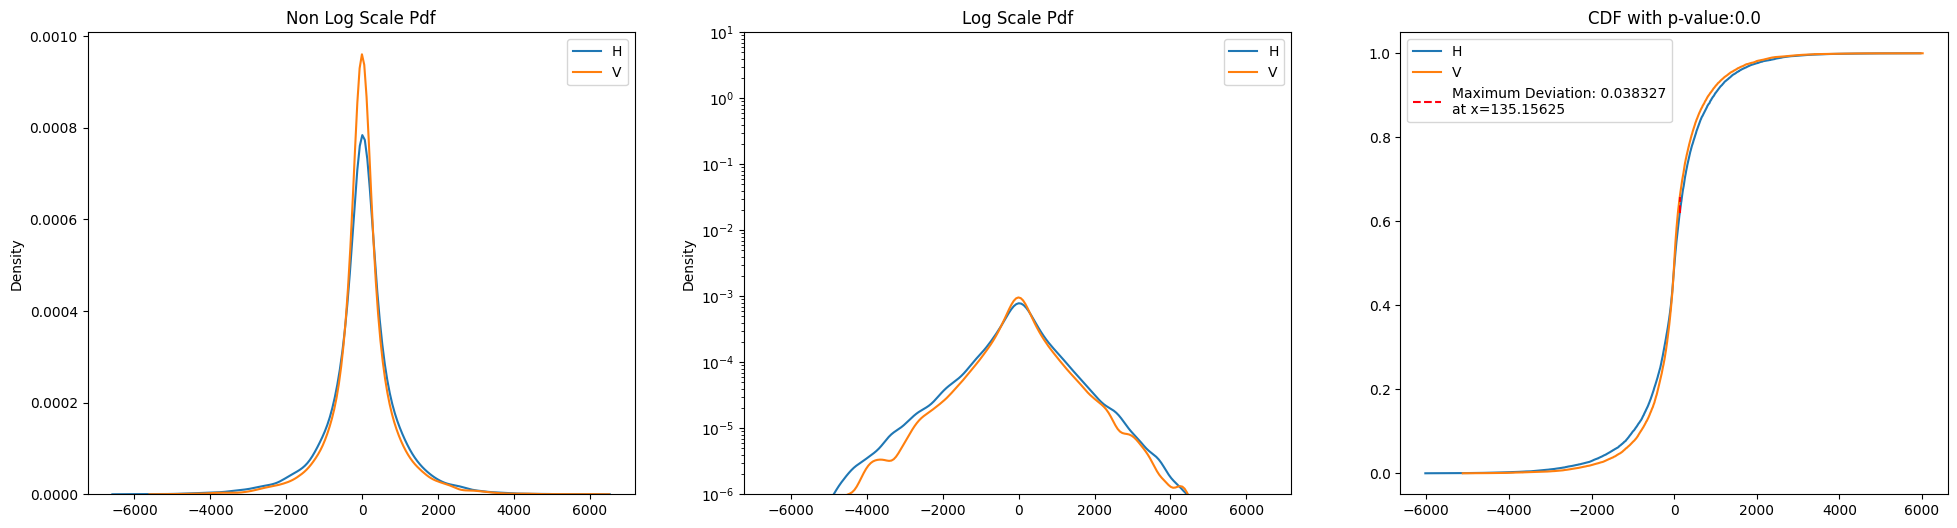

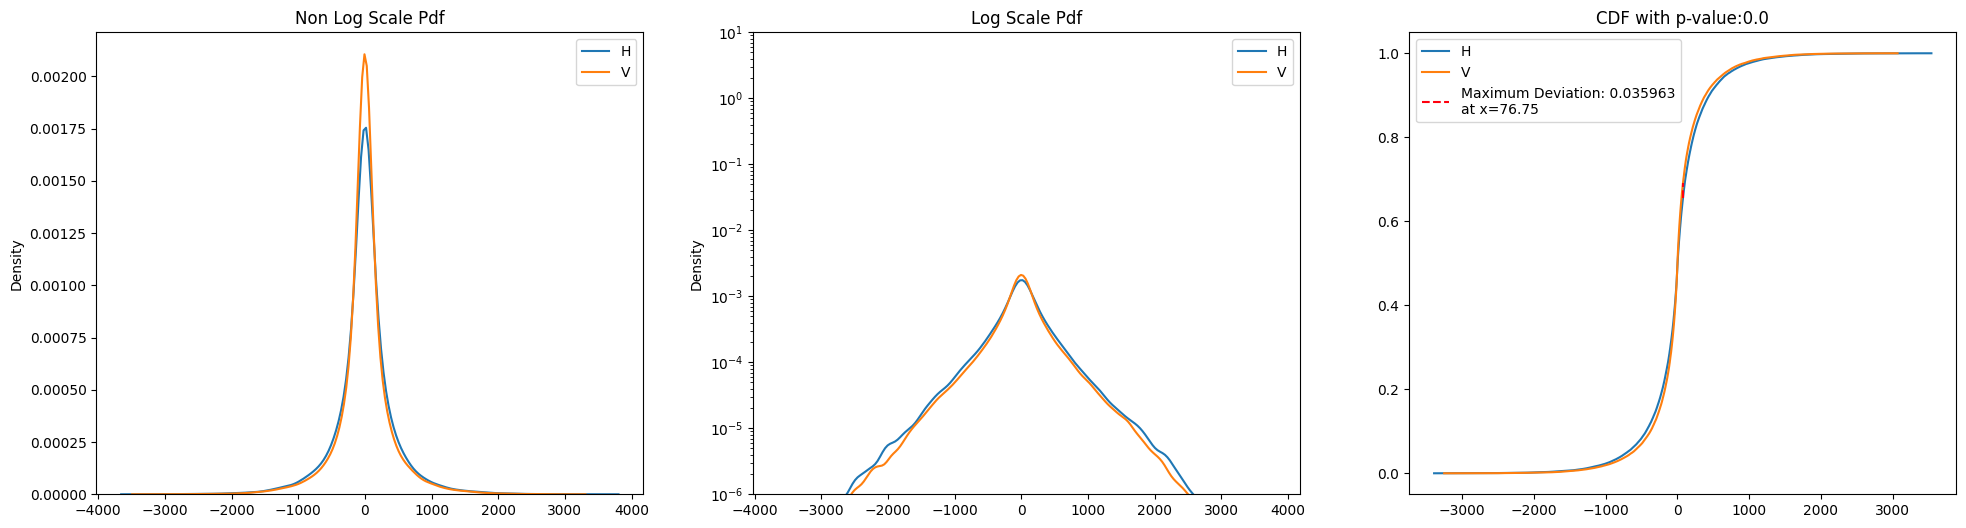

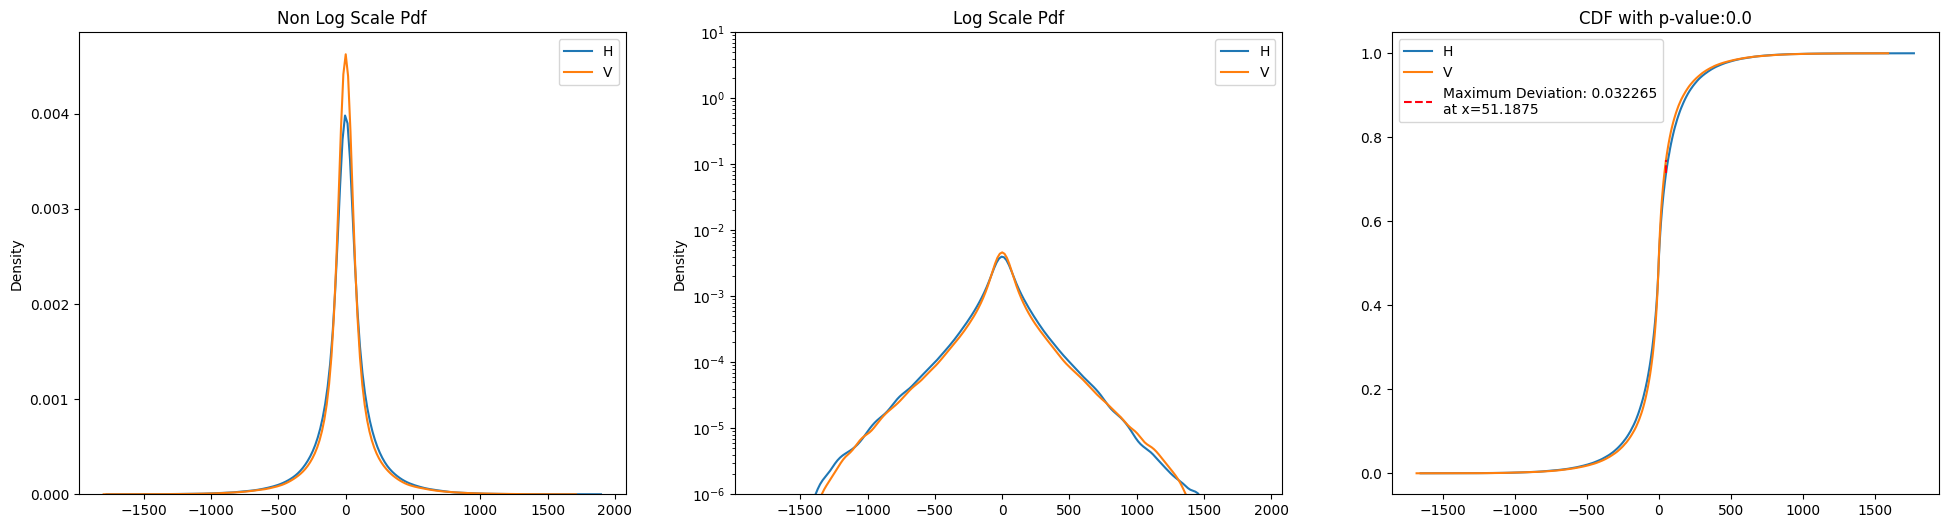

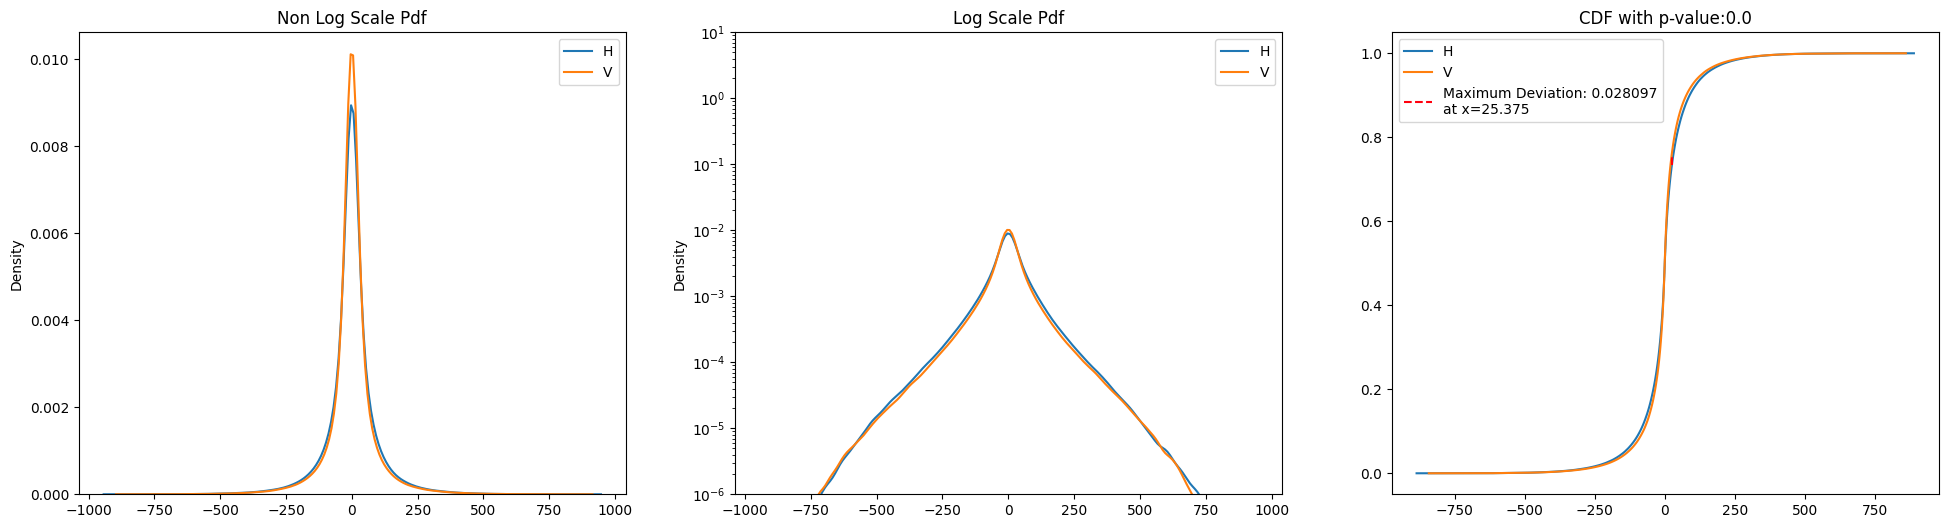

In [9]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Green

In [10]:
green_wv = convert_to_wavelet_basis(data_dir, "green", debug=True, image_opener = npz_opener_pickle)
green_wv.head()

10 layers being used


100%|██████████| 276/276 [00:02<00:00, 97.56it/s] 


channel  layer  frequency orientation  \
0   green      1   0.099611          L1   
1   green      2   0.110679           D   
2   green      2   0.110679           H   
3   green      2   0.110679           V   
4   green      3   0.124514           D   

                                                data  
0  [60254.50390625007, 48659.789062500065, 90077....  
1  [902.2968749999989, -752.7500000000003, 1697.1...  
2  [1133.0195312500027, -2610.074218750005, 627.5...  
3  [-355.19531249999875, -14559.863281250018, 664...  
4  [1561.4218750000016, 48.22656249999794, -897.2...

In [11]:
green_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    green_df = pd.concat([green_df, ks_df], axis = 0)
green_df

/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_1447/3122142642.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  green_df = pd.concat([green_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.115942   4.886912e-02
2     2     H      V  0.119565   3.858947e-02
0     2     D      H  0.177536   3.234650e-04
1     3     D      V  0.095109   9.107436e-05
2     3     H      V  0.101449   2.291838e-05
0     3     D      H  0.189312   1.050666e-17
2     4     H      V  0.073596   8.036188e-11
1     4     D      V  0.077219   7.164792e-12
0     4     D      H  0.139719   5.538898e-38
2     5     H      V  0.041270   1.652811e-13
1     5     D      V  0.085315   2.239011e-56
0     5     D      H  0.114753  8.986587e-102
2     6     H      V  0.038058   6.785598e-45
1     6     D      V  0.077304  4.582331e-184
0     6     D      H  0.107493   0.000000e+00
2     7     H      V  0.030100  1.159065e-111
1     7     D      V  0.072715   0.000000e+00
0     7     D      H  0.100851   0.000000e+00
2     8     H      V  0.027085   0.000000e+00
1     8     D      V  0.070065   0.000000e+00
0     8     D      H  0.096734   0.000000e+00

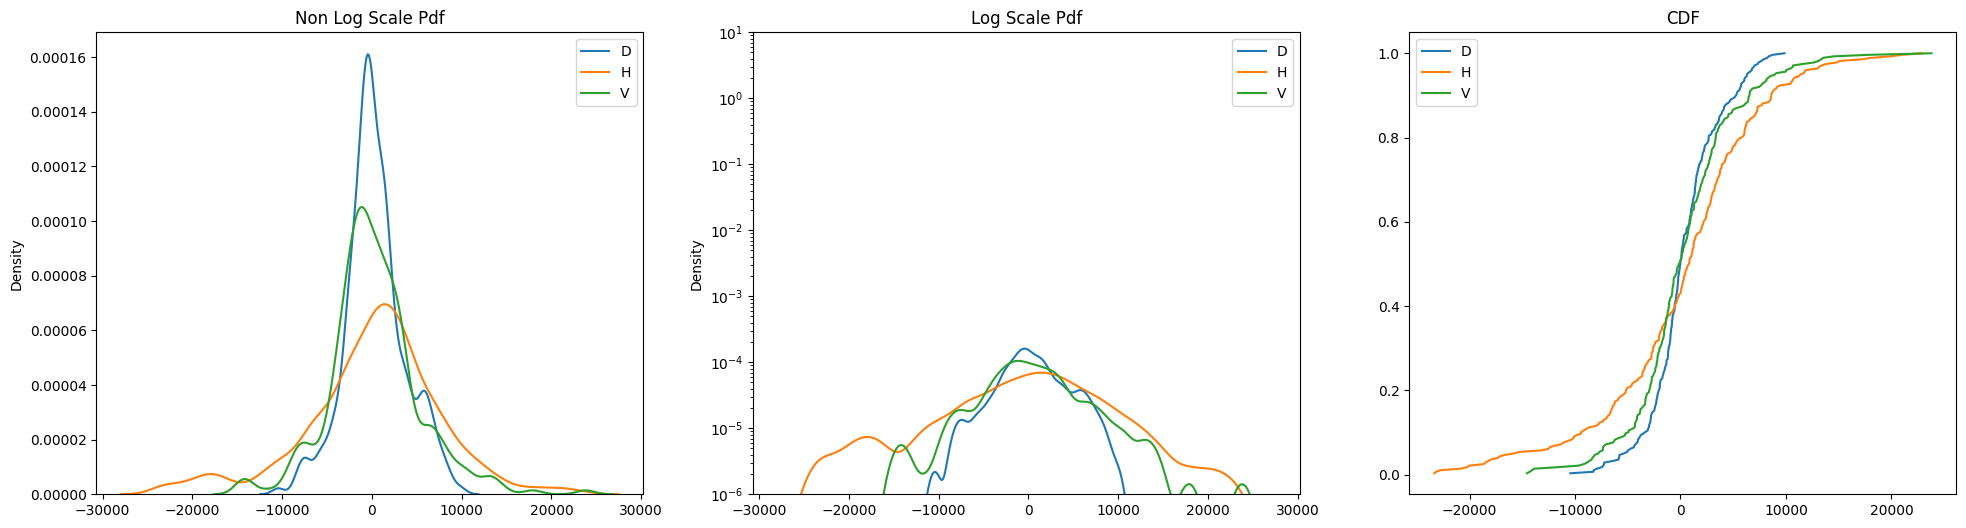

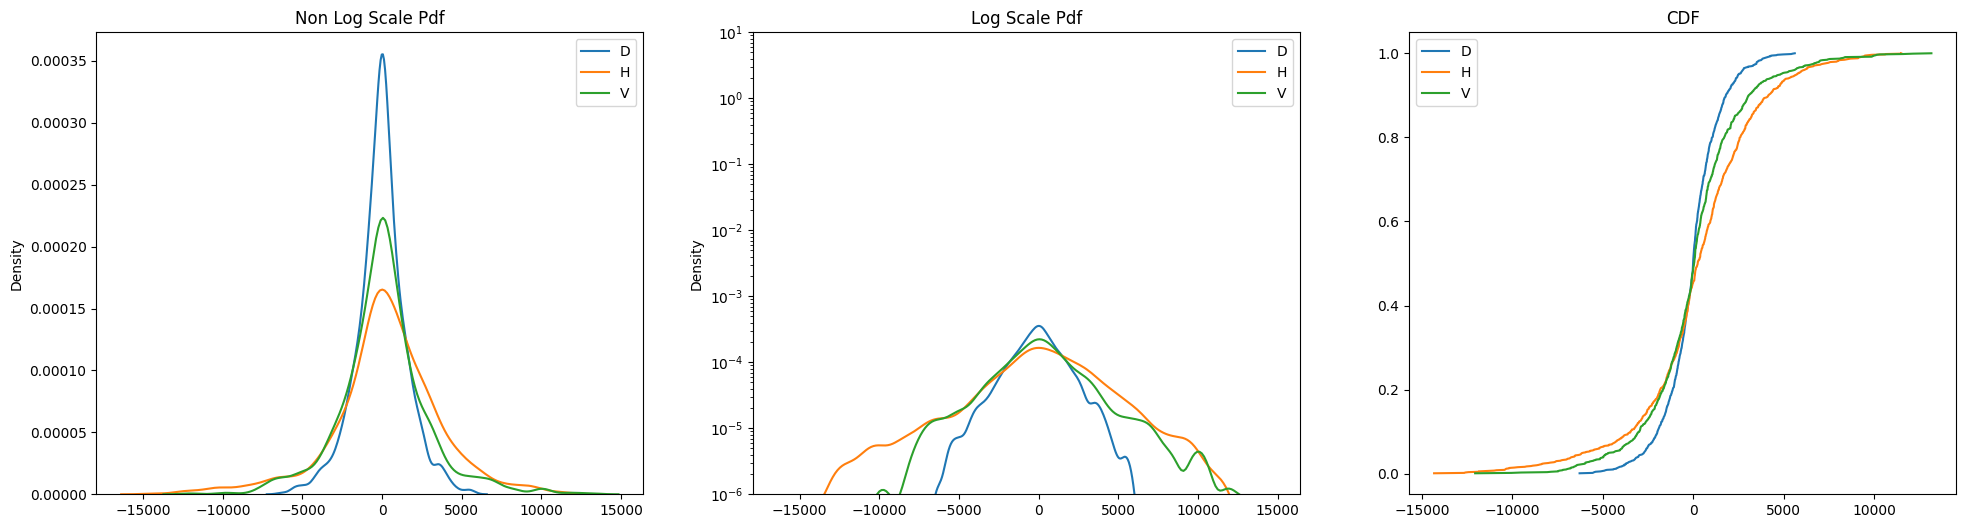

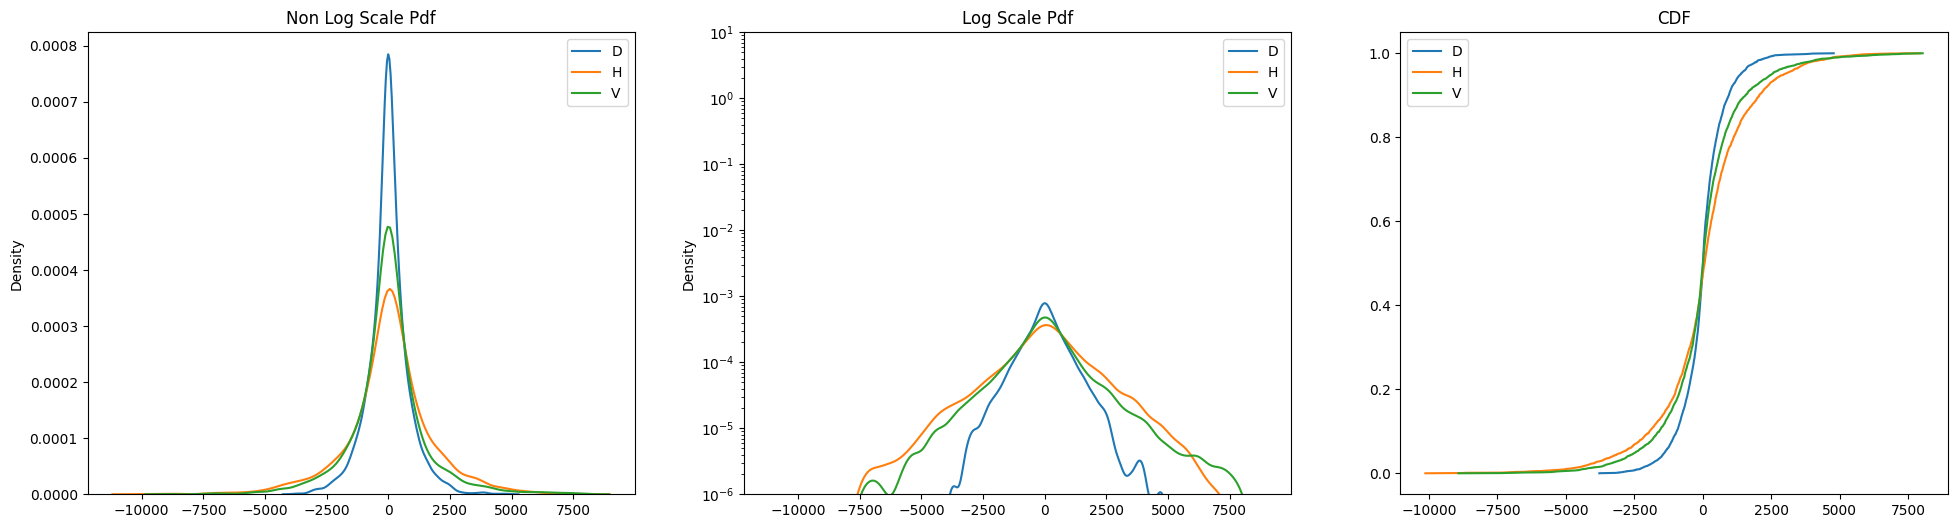

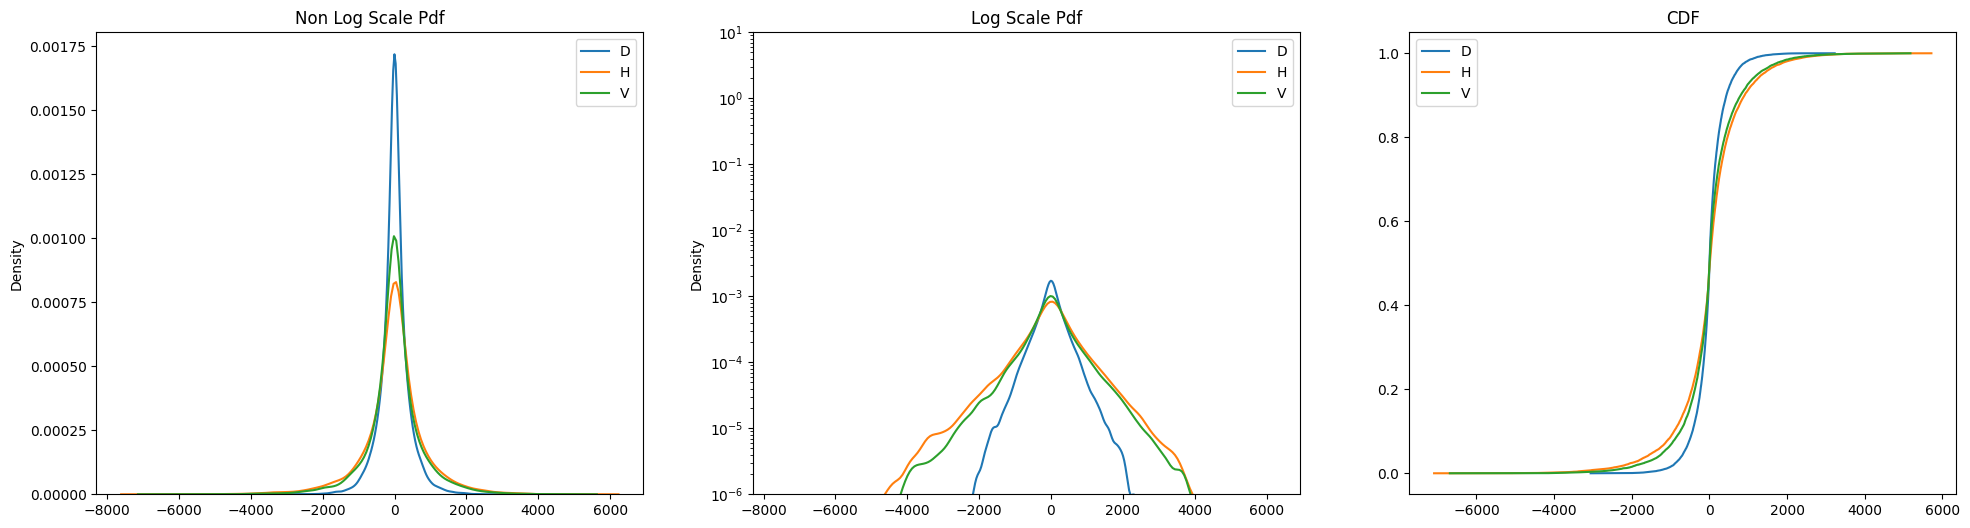

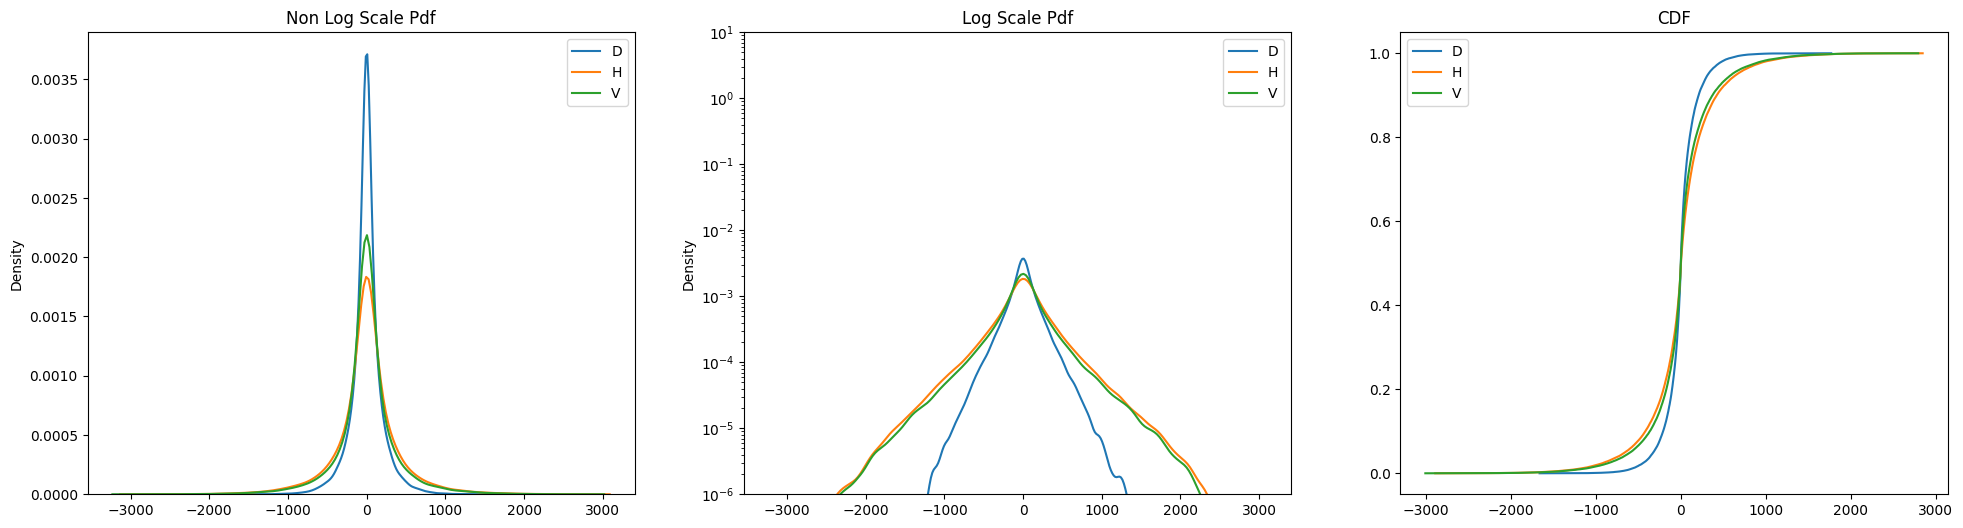

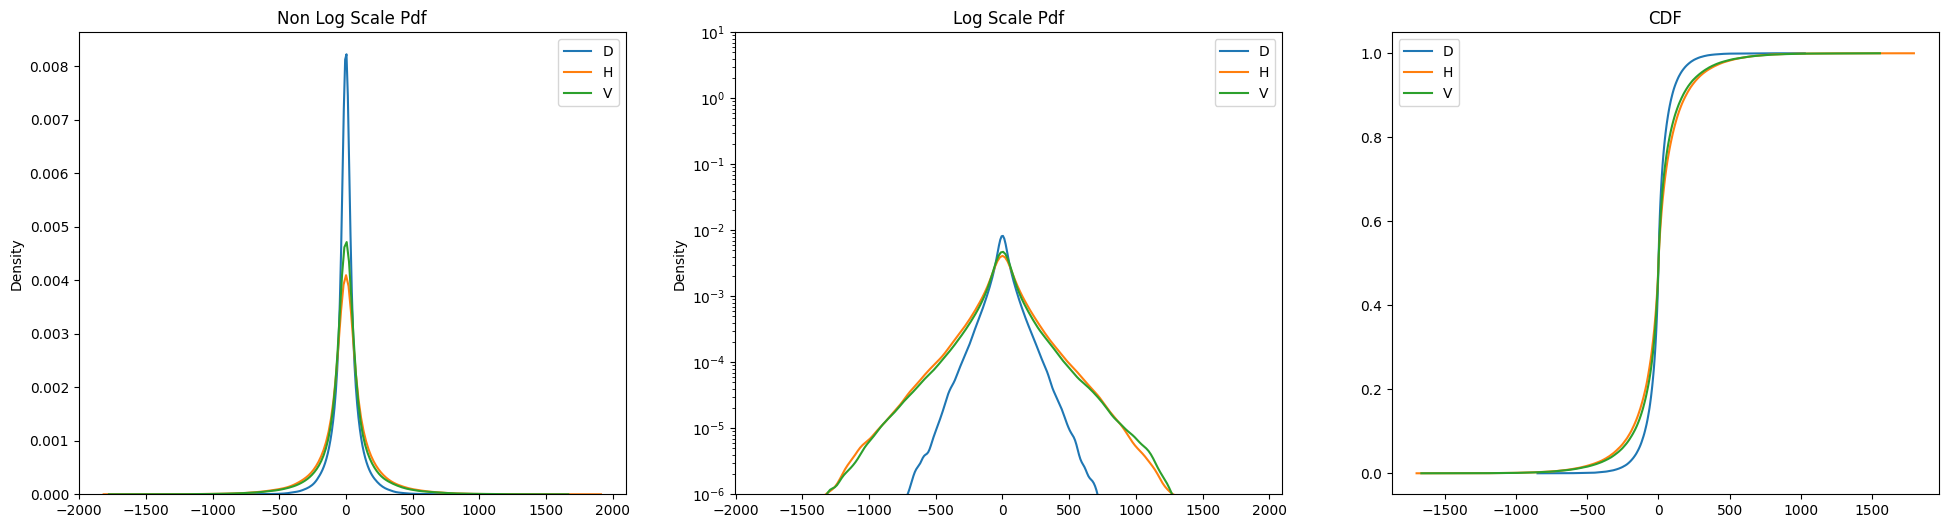

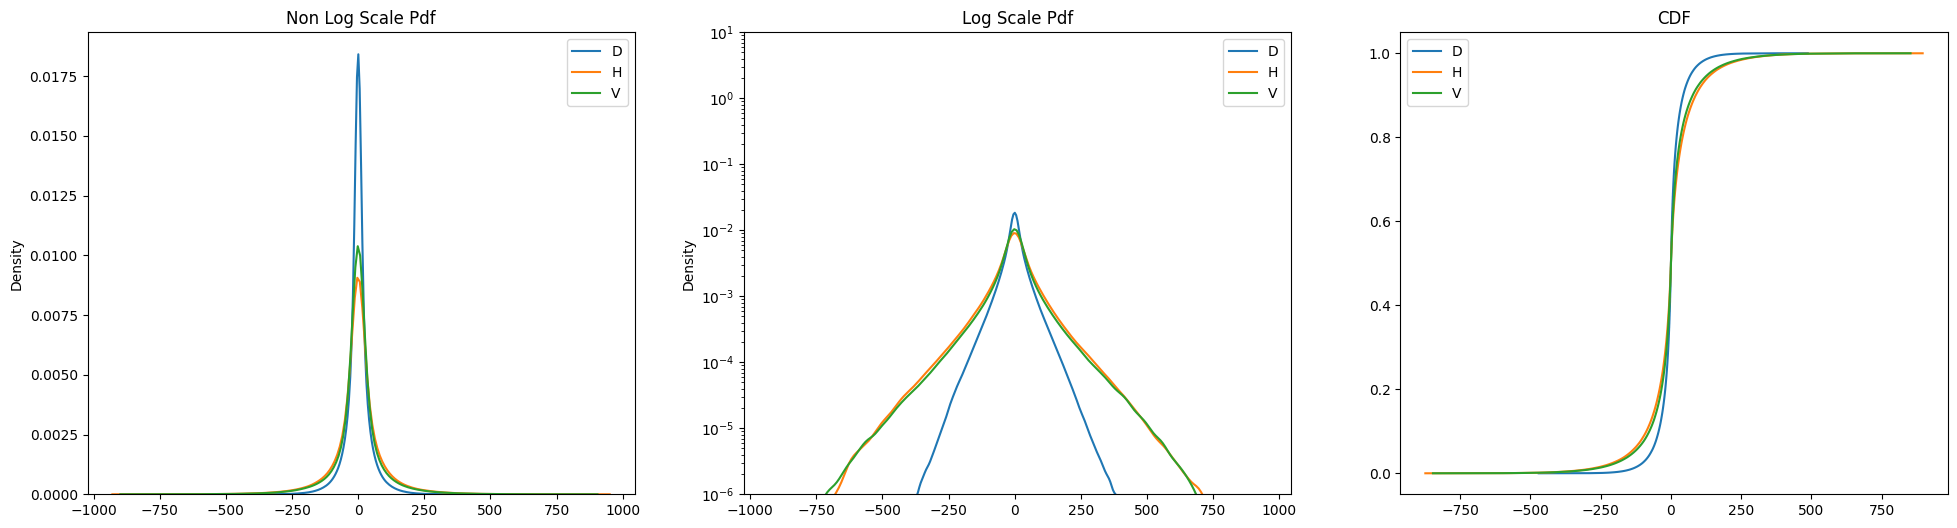

In [12]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


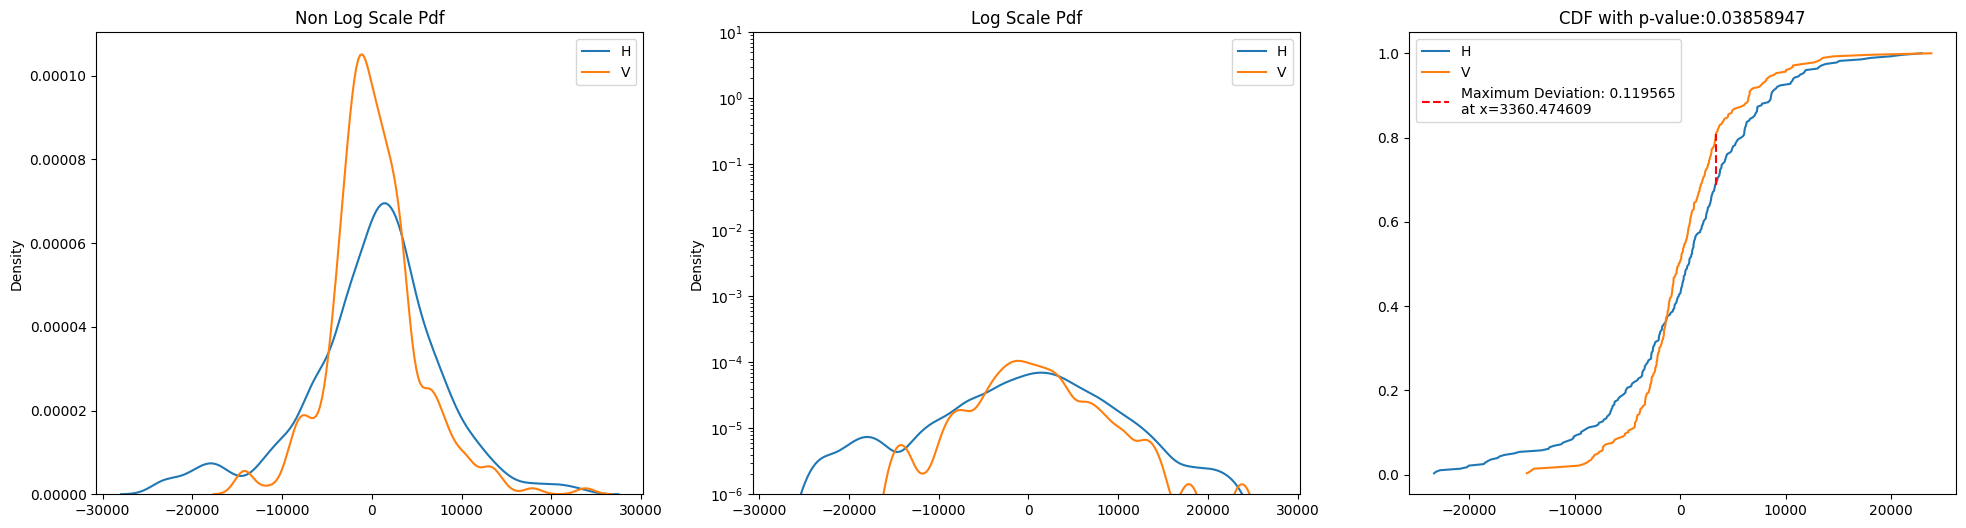

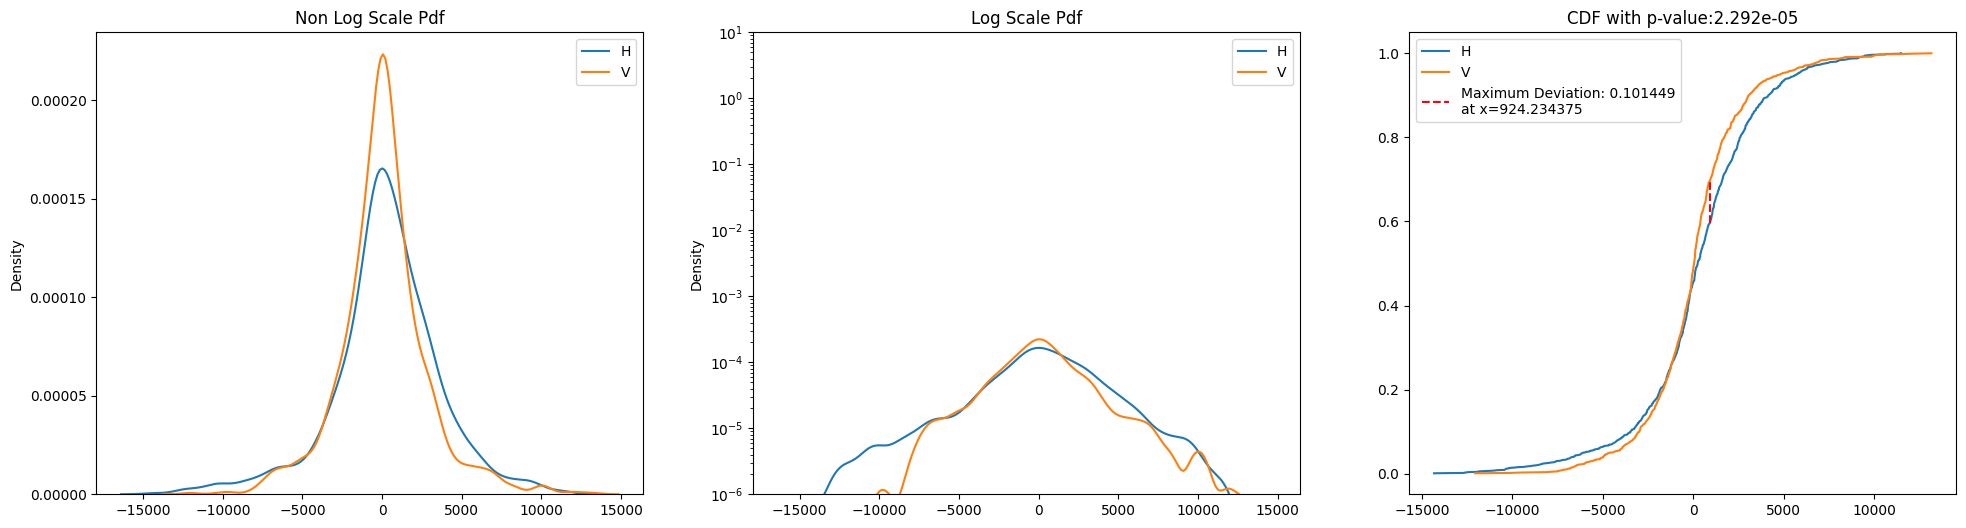

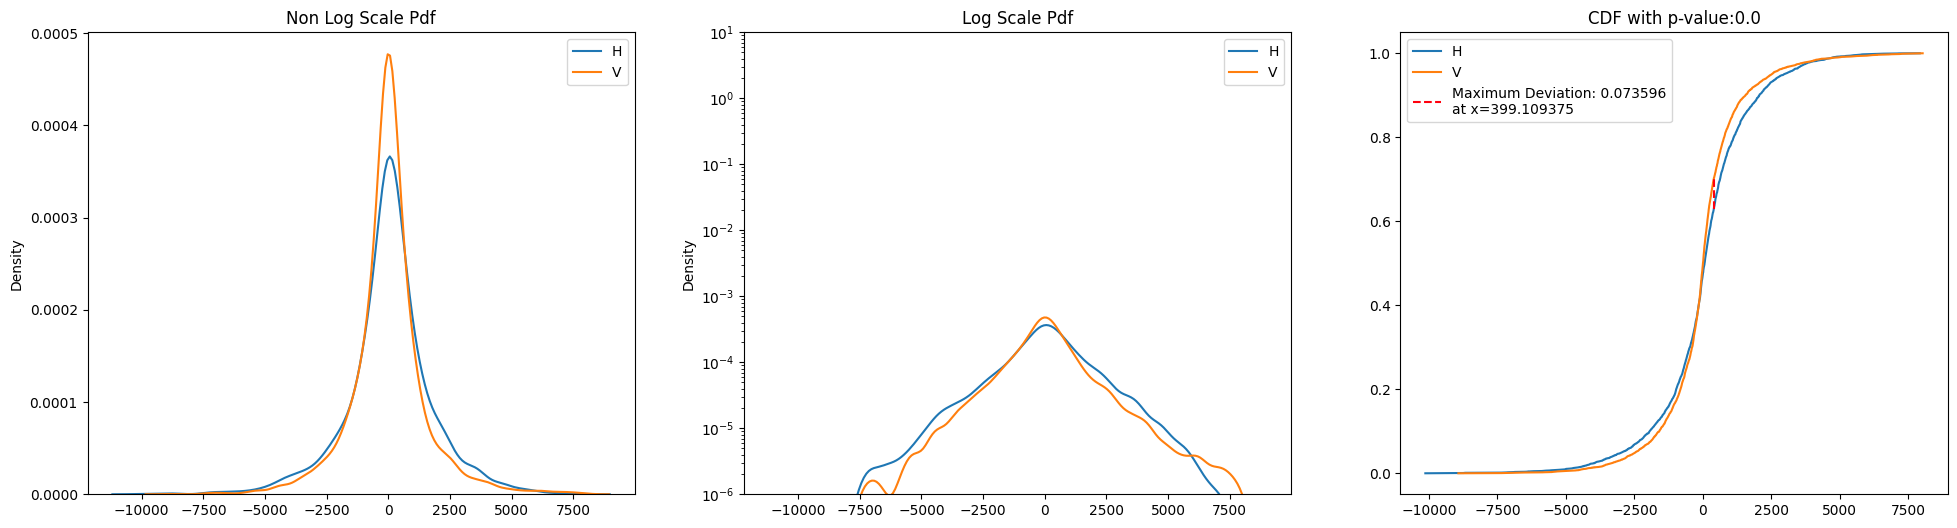

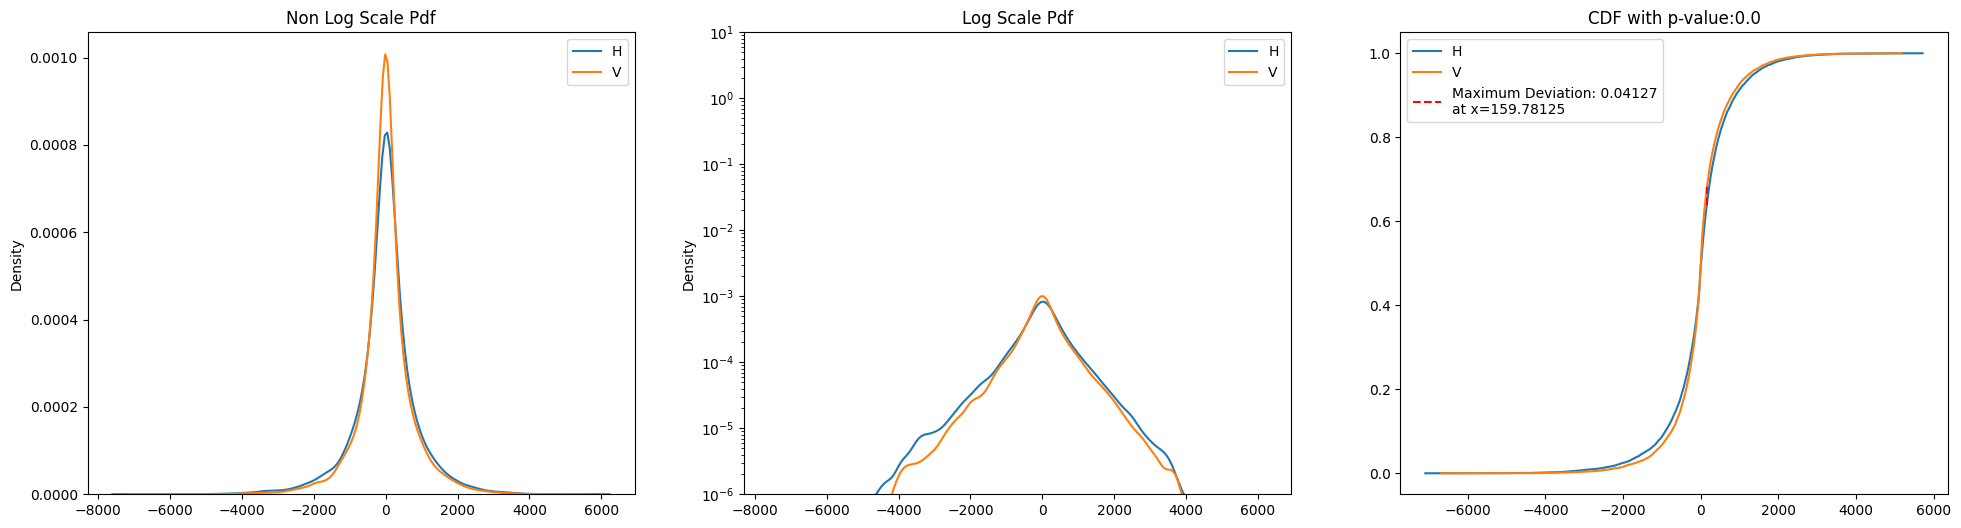

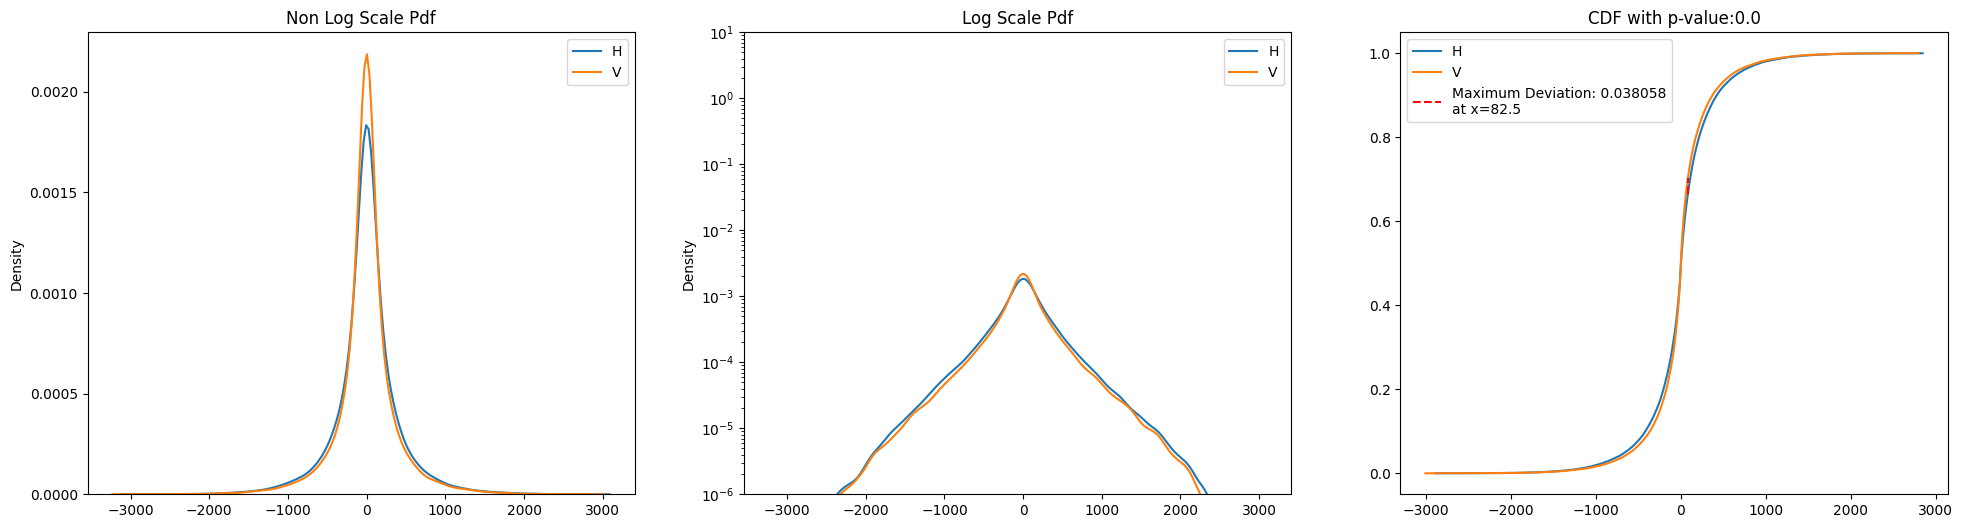

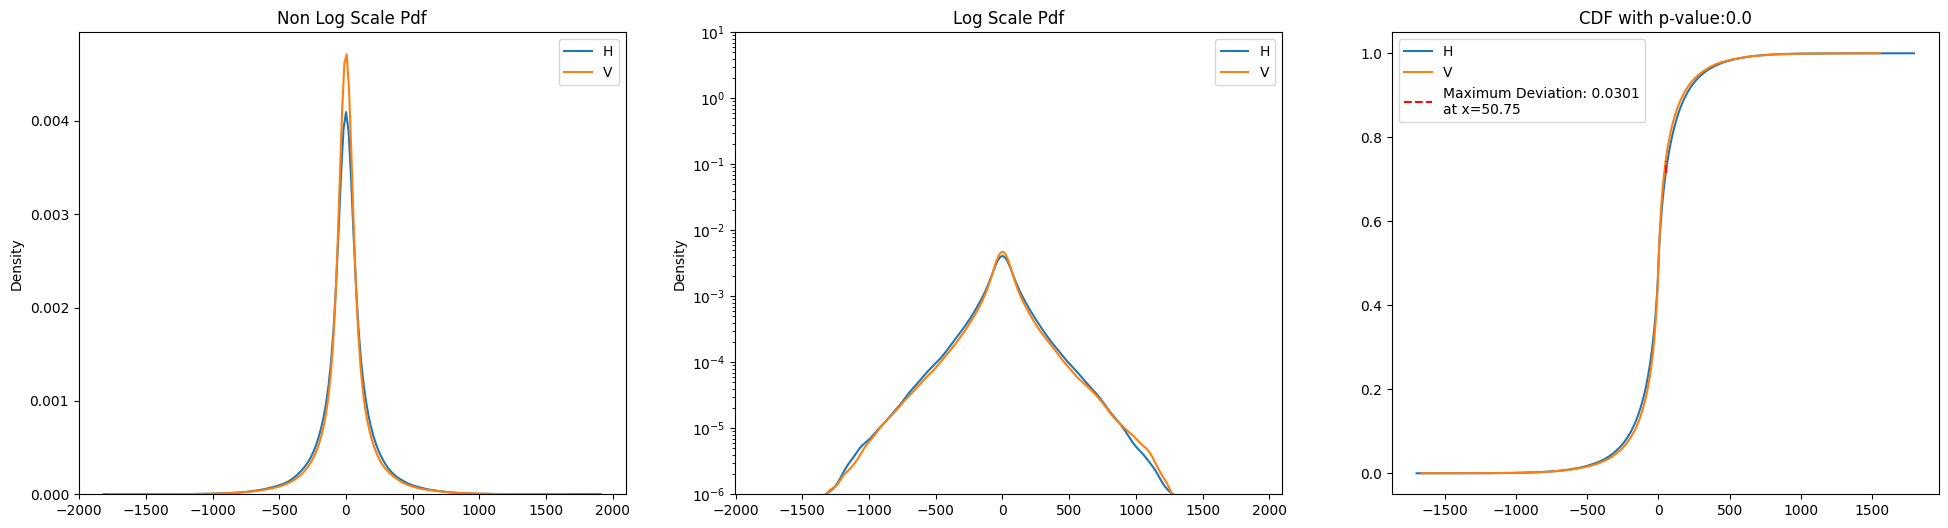

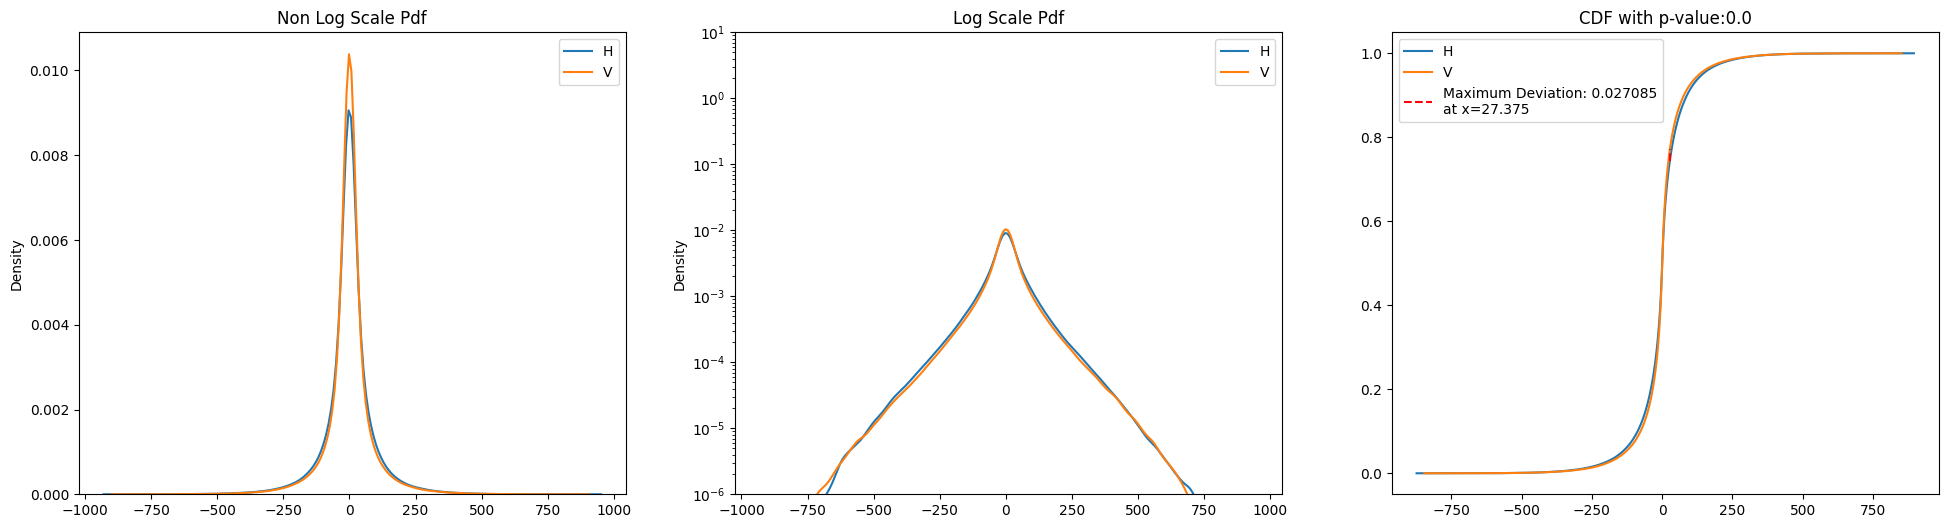

In [13]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Blue

In [14]:
blue_wv = convert_to_wavelet_basis(data_dir, "blue", debug=True, image_opener = npz_opener_pickle)
blue_wv.head()

10 layers being used


100%|██████████| 276/276 [00:02<00:00, 96.04it/s] 


channel  layer  frequency orientation  \
0    blue      1   0.099611          L1   
1    blue      2   0.110679           D   
2    blue      2   0.110679           H   
3    blue      2   0.110679           V   
4    blue      3   0.124514           D   

                                                data  
0  [30034.572265625036, 42459.27148437506, 61878....  
1  [6817.138671875007, -54.95898437500005, 1830.6...  
2  [-1329.669921875002, -3652.419921875006, -154....  
3  [-123.64257812499719, -10867.658203125011, 754...  
4  [6257.597656250006, 61.17187500000028, -1313.8...

In [15]:
blue_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    blue_df = pd.concat([blue_df, ks_df], axis = 0)
blue_df

/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_1447/3852482873.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blue_df = pd.concat([blue_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.119565   3.858947e-02
2     2     H      V  0.141304   8.017429e-03
0     2     D      H  0.206522   1.449124e-05
2     3     H      V  0.085145   6.644587e-04
1     3     D      V  0.086051   5.597192e-04
0     3     D      H  0.163949   2.295989e-13
2     4     H      V  0.075408   2.434760e-11
1     4     D      V  0.084918   2.858063e-14
0     4     D      H  0.137228   1.188149e-36
2     5     H      V  0.041667   9.242469e-14
1     5     D      V  0.082428   1.196233e-52
0     5     D      H  0.110168   8.164219e-94
2     6     H      V  0.034137   3.332195e-36
1     6     D      V  0.075252  1.965408e-174
0     6     D      H  0.102836   0.000000e+00
2     7     H      V  0.030804  6.282262e-117
1     7     D      V  0.070737   0.000000e+00
0     7     D      H  0.097975   0.000000e+00
2     8     H      V  0.028001   0.000000e+00
1     8     D      V  0.068896   0.000000e+00
0     8     D      H  0.094196   0.000000e+00

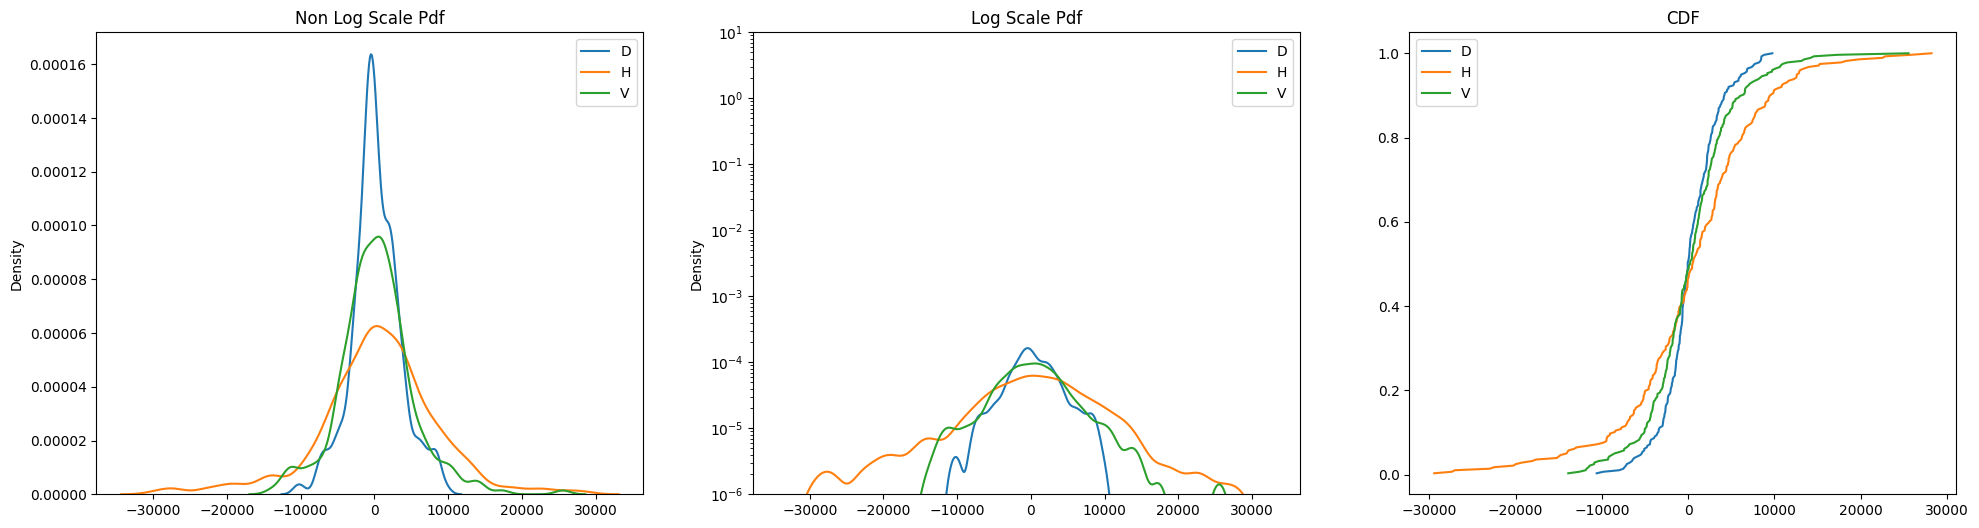

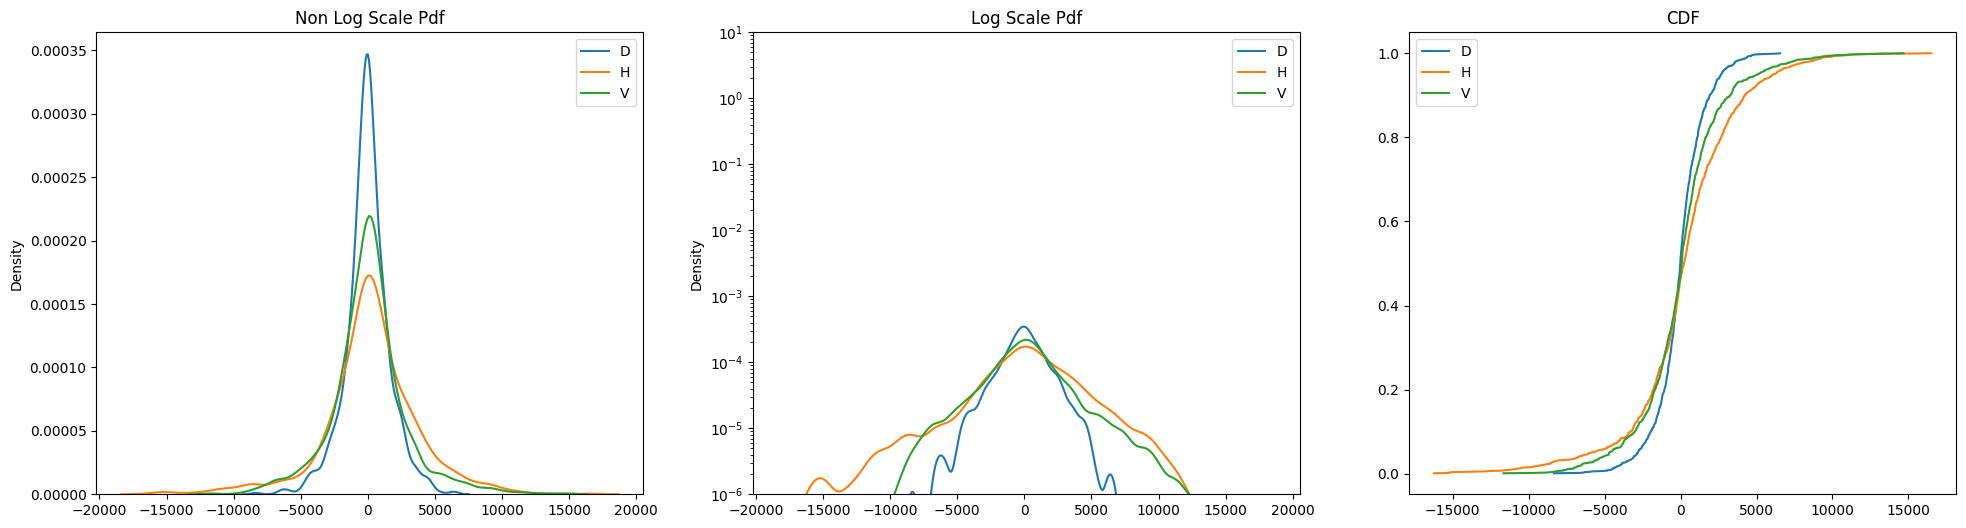

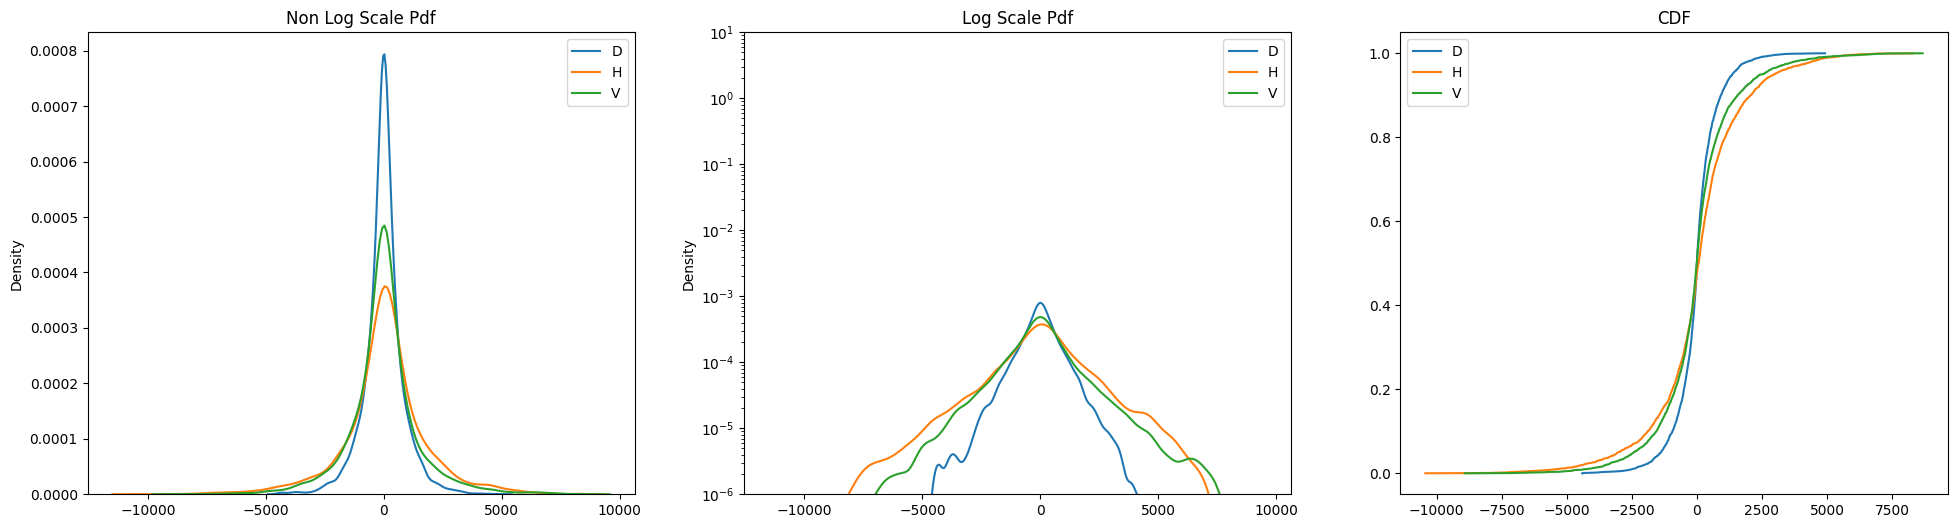

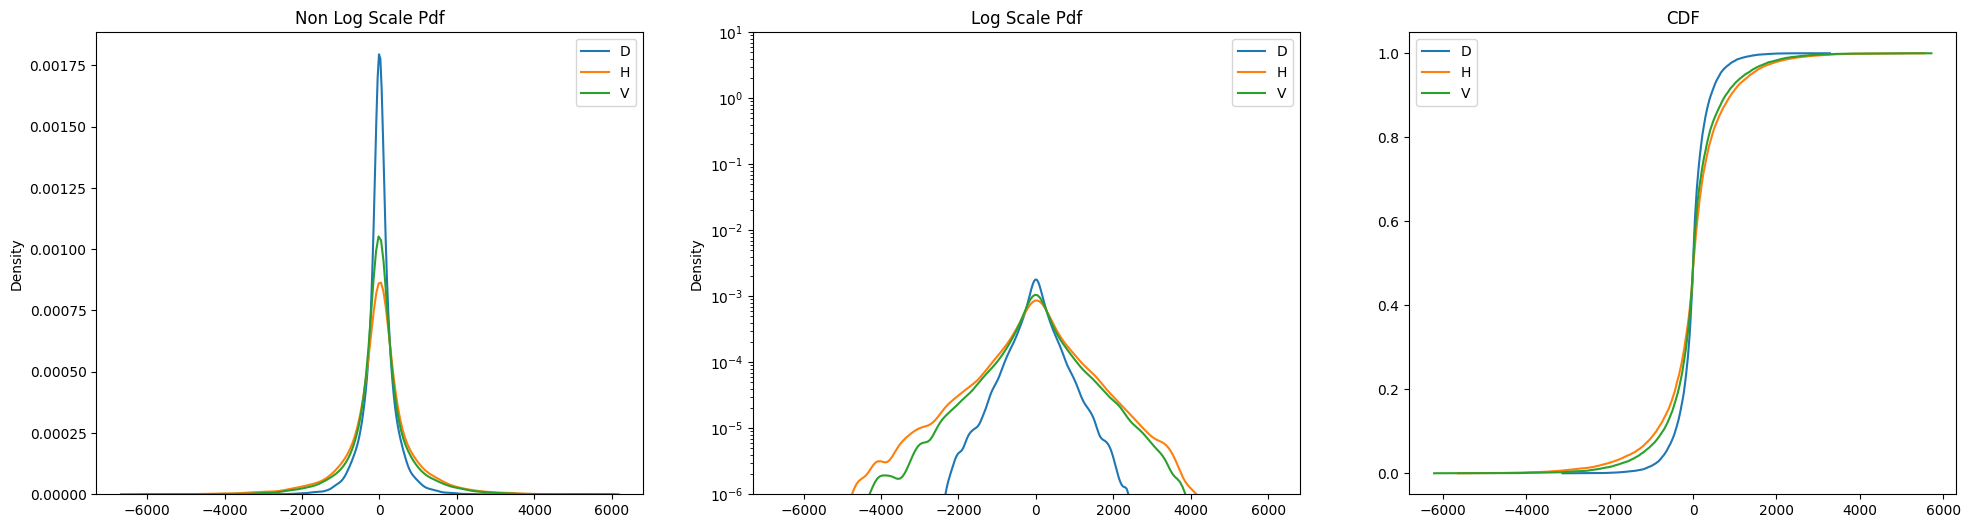

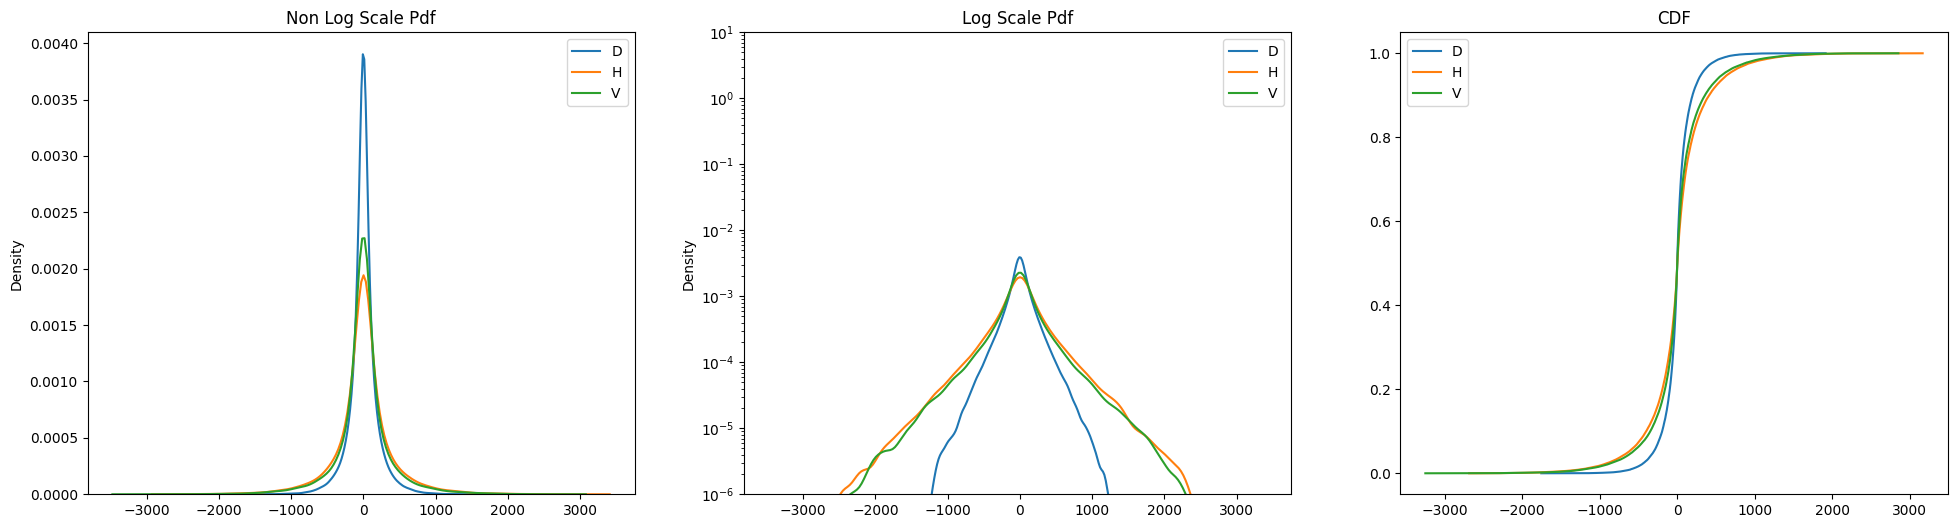

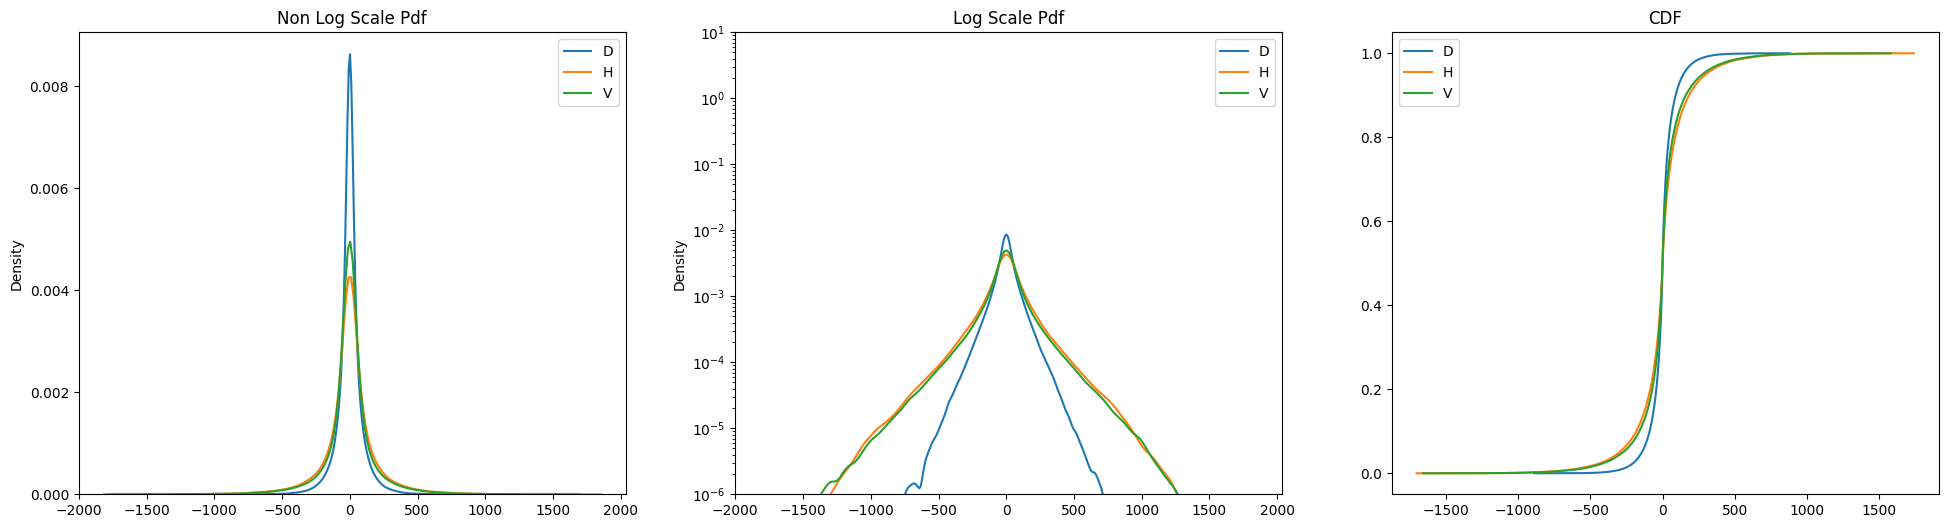

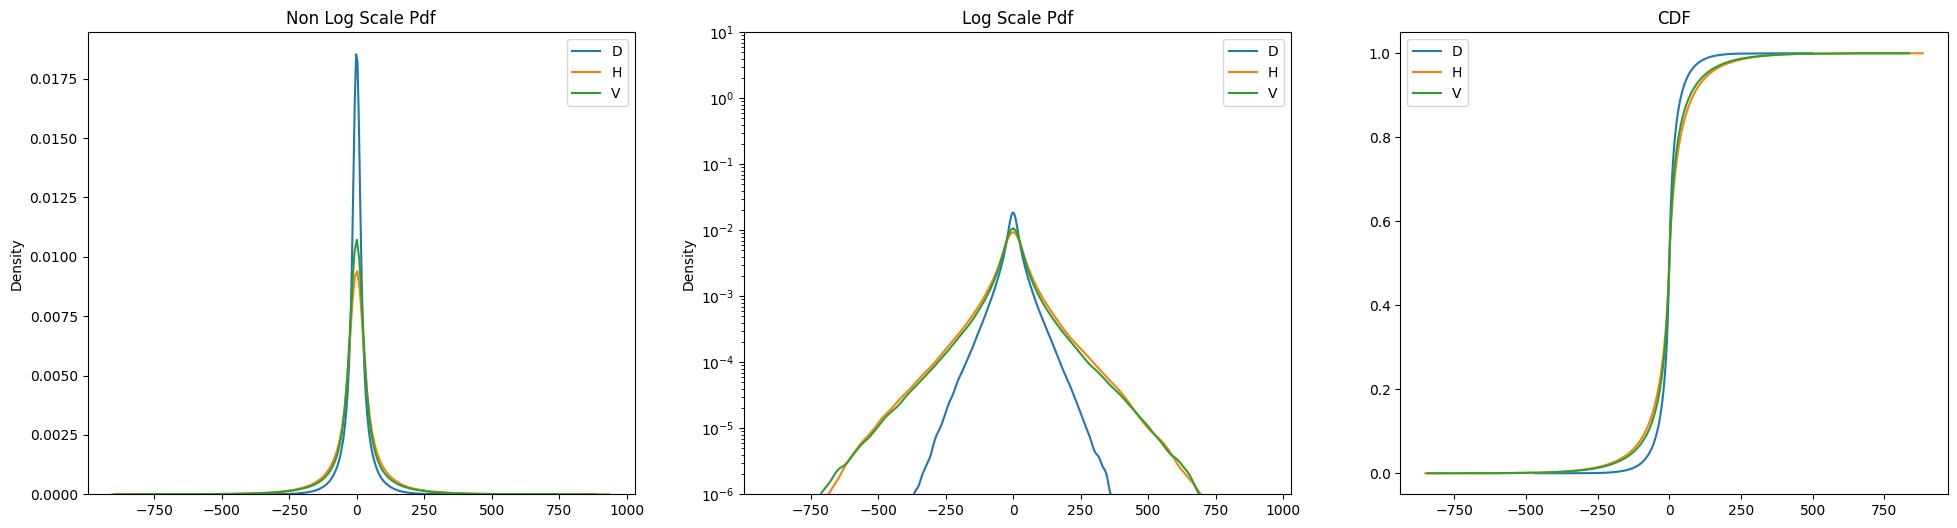

In [16]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


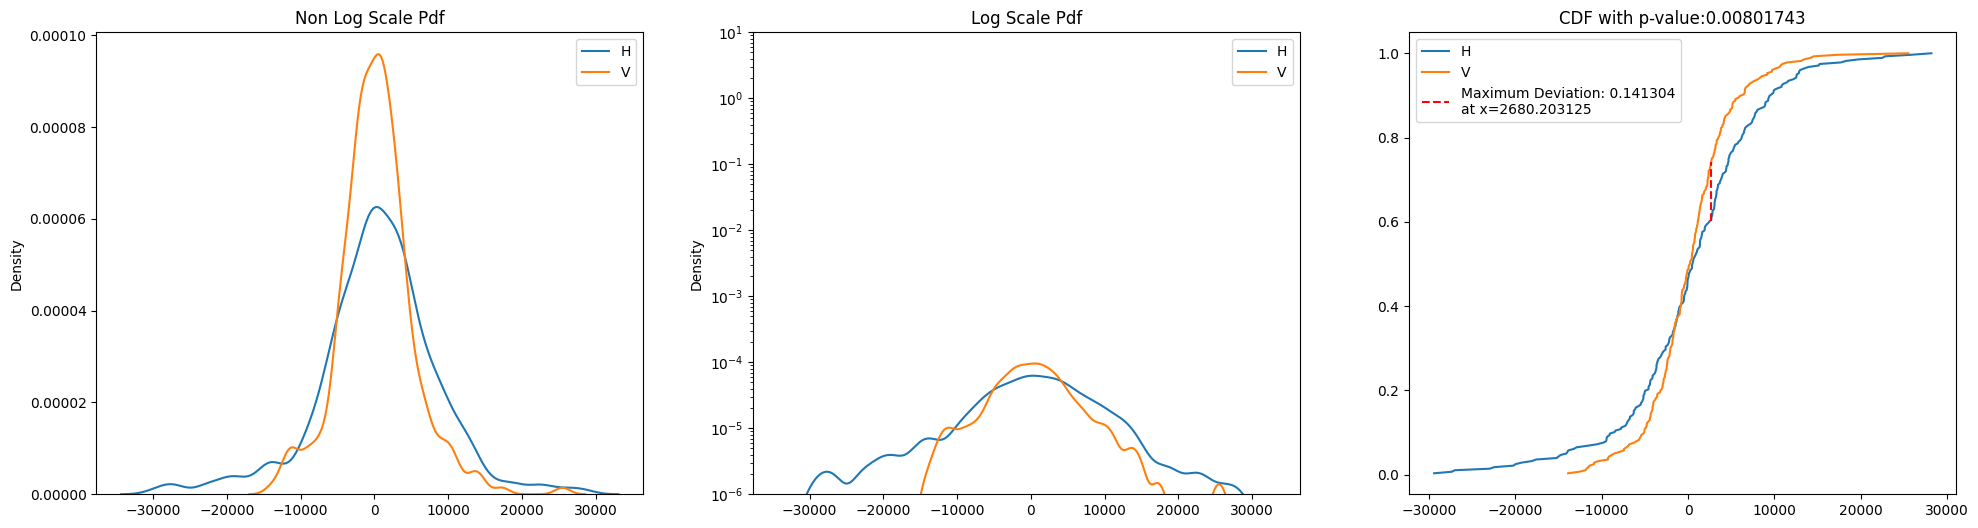

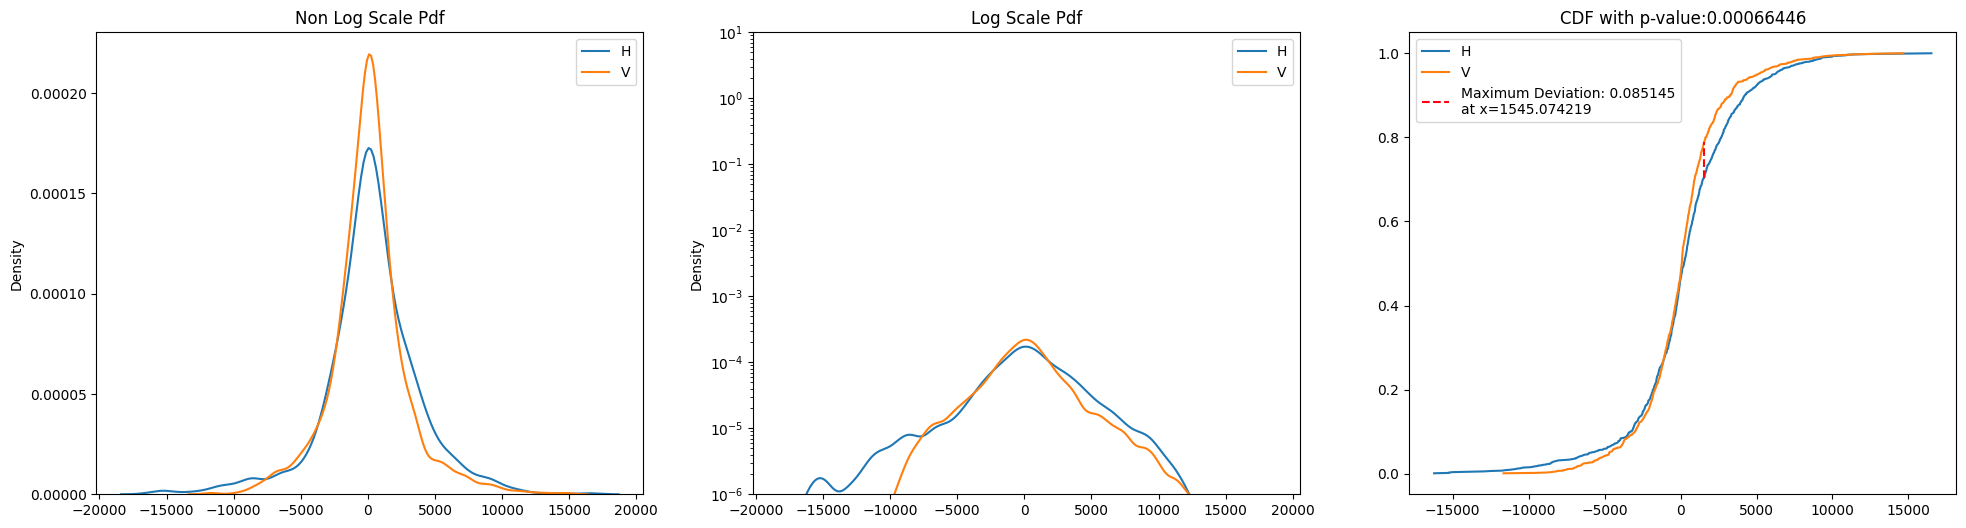

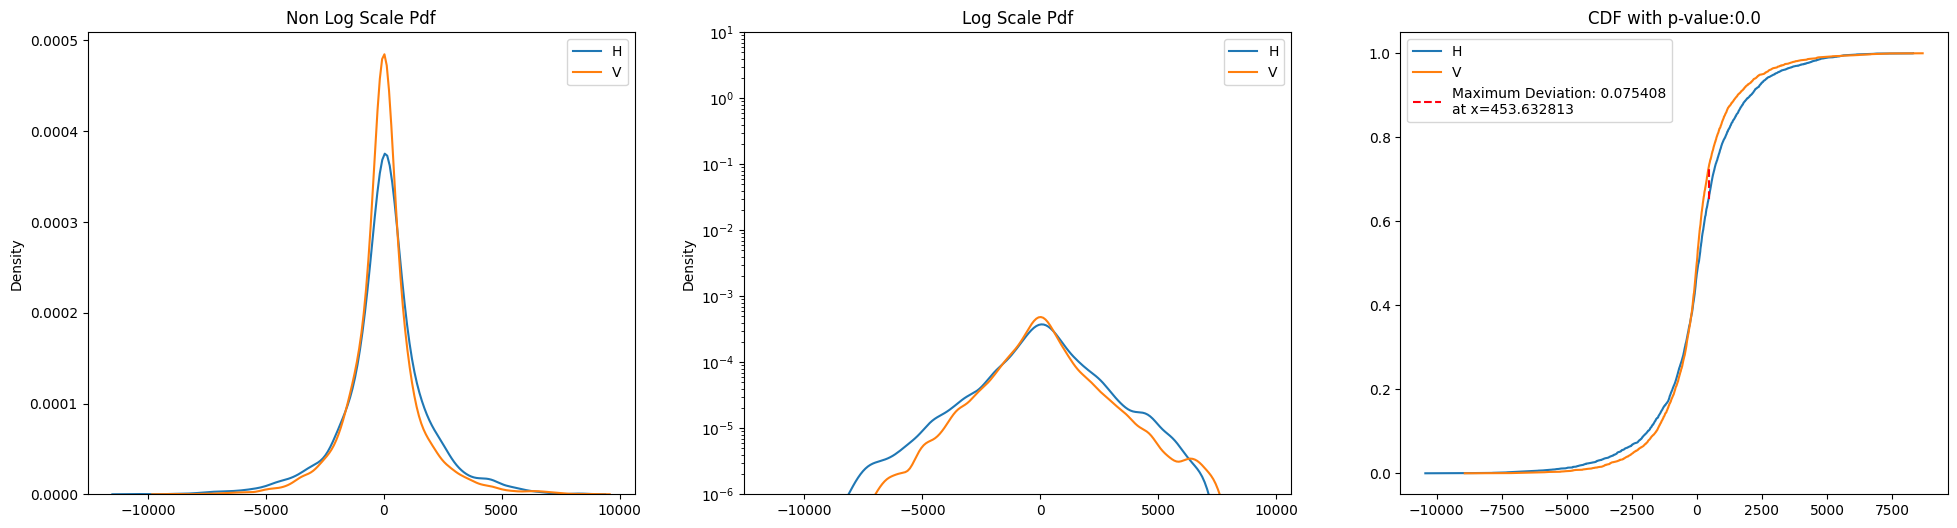

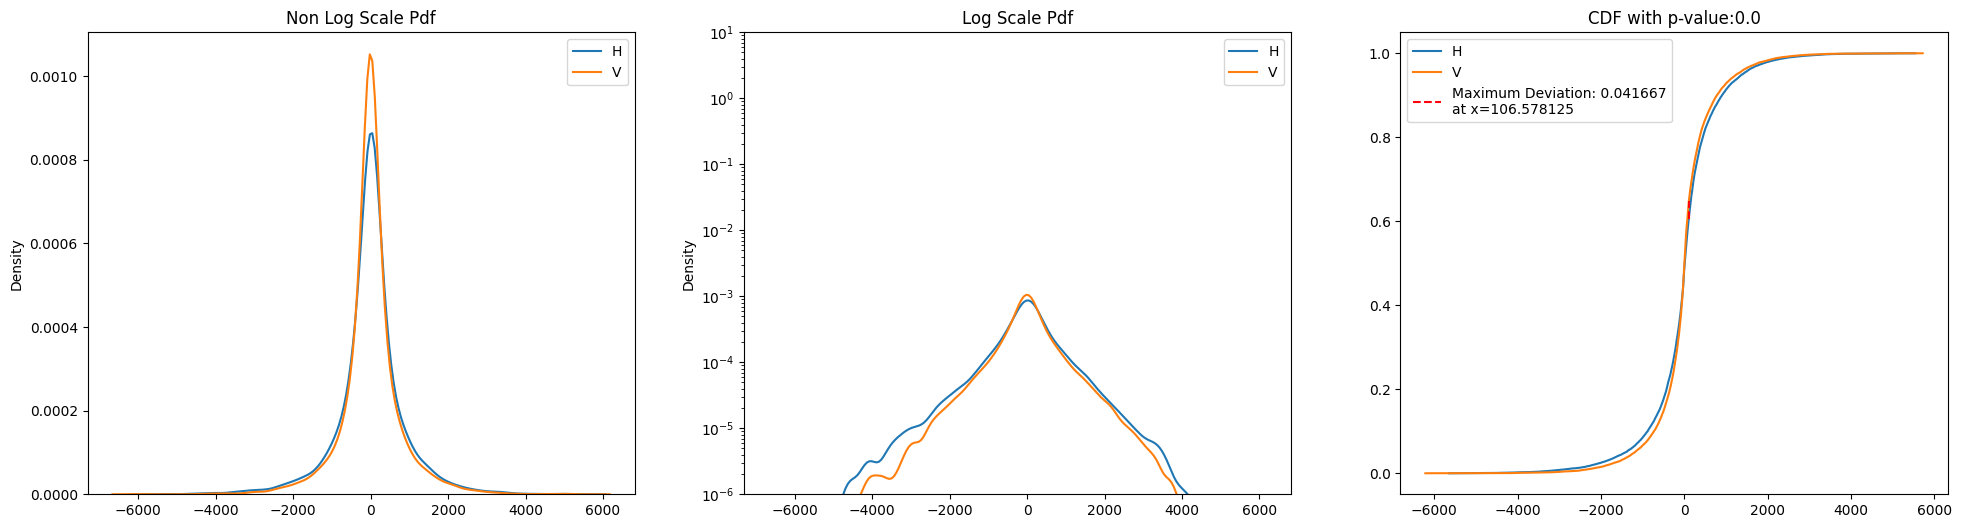

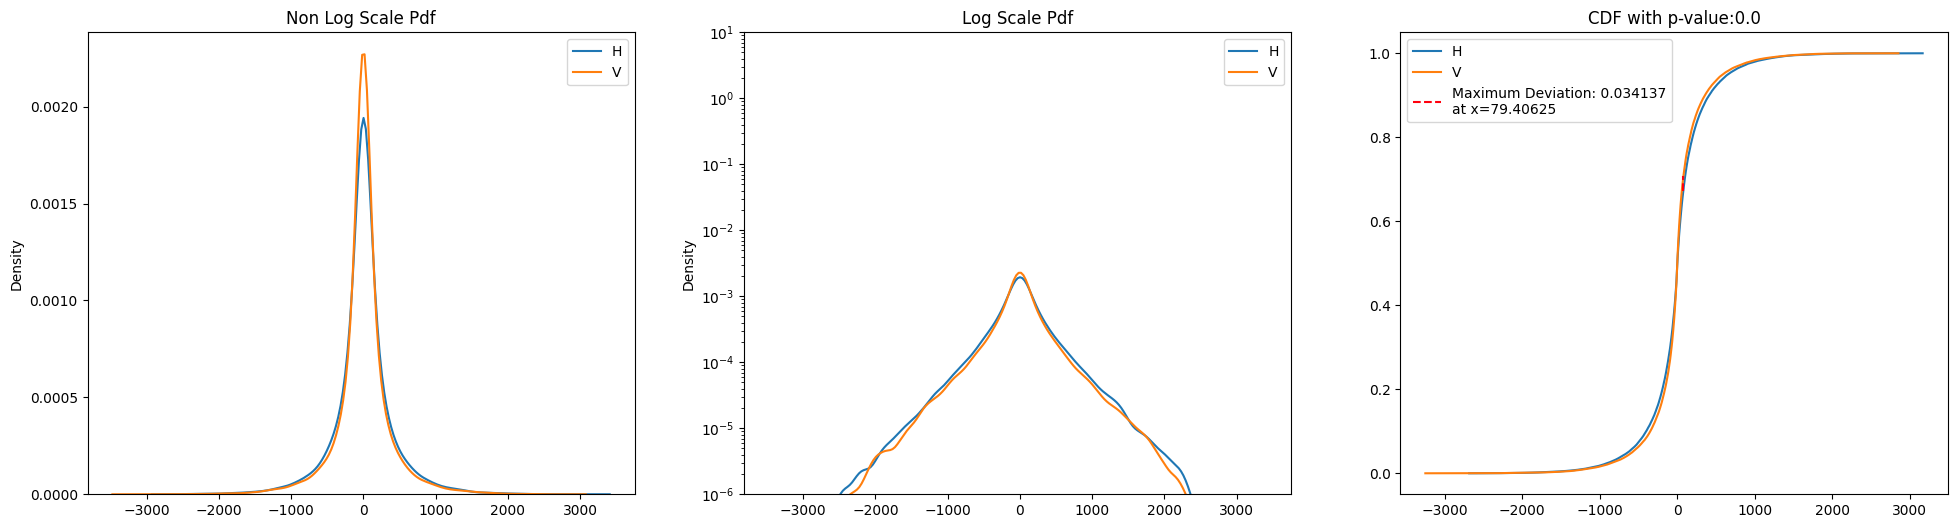

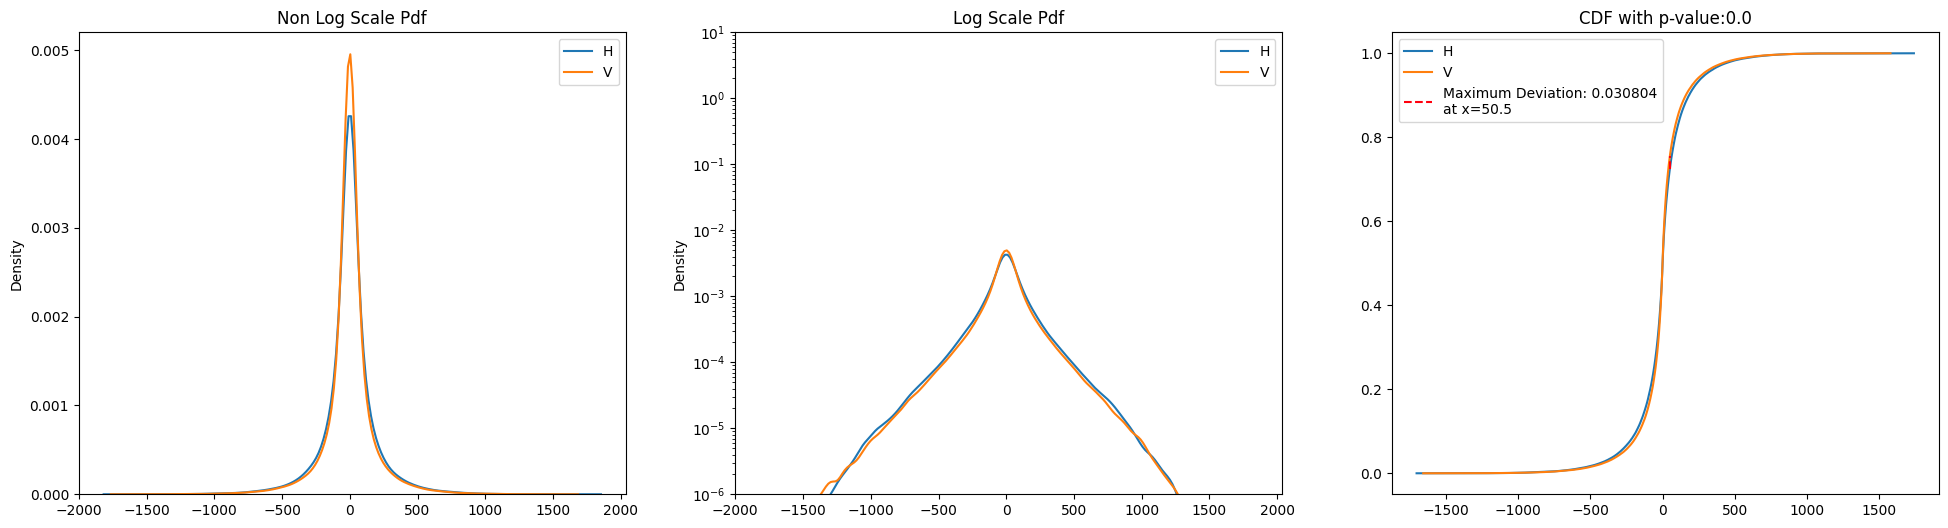

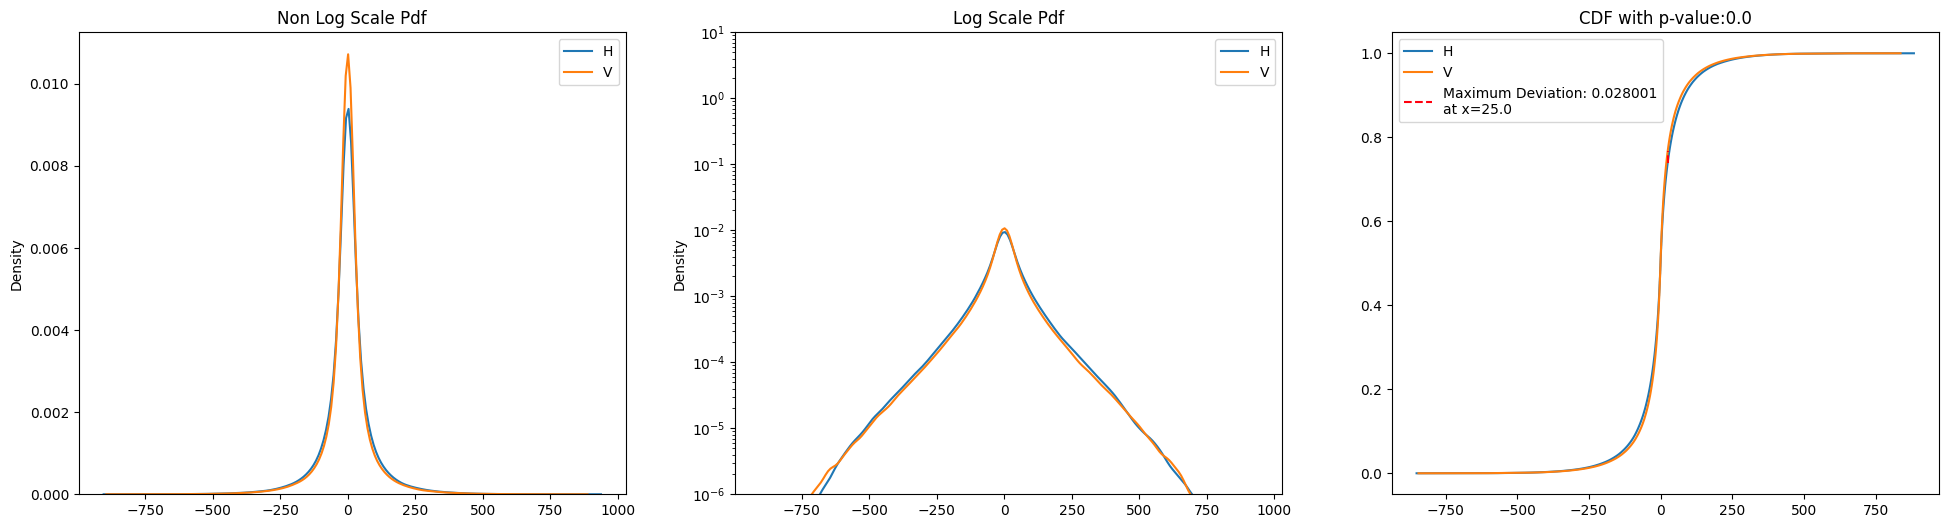

In [17]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Gray

In [18]:
gray_wv = convert_to_wavelet_basis(data_dir, "gray", debug=True, image_opener = npz_opener_pickle)
gray_wv.head()

10 layers being used


100%|██████████| 276/276 [00:03<00:00, 82.48it/s]


channel  layer  frequency orientation  \
0    gray      1   0.099611          L1   
1    gray      2   0.110679           D   
2    gray      2   0.110679           H   
3    gray      2   0.110679           V   
4    gray      3   0.124514           D   

                                                data  
0  [58814.01022363288, 49292.58983710944, 86745.5...  
1  [2538.762208398438, -282.0847863281241, 2133.0...  
2  [1385.2565384765621, -2804.1560718750047, 626....  
3  [1154.896839648438, -14182.402138281266, 314.6...  
4  [3210.0941535156257, -12.312568749997746, -897...

In [19]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/hn/7wzd6_fs6wncrcy89b9jdj100000gn/T/ipykernel_1447/1887393883.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gray_df = pd.concat([gray_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
1     2     D      V  0.112319   6.143464e-02
2     2     H      V  0.126812   2.353805e-02
0     2     D      H  0.166667   9.161362e-04
1     3     D      V  0.096920   6.196731e-05
2     3     H      V  0.096920   6.196731e-05
0     3     D      H  0.183877   1.011535e-16
2     4     H      V  0.072917   1.248130e-10
1     4     D      V  0.080842   5.684703e-13
0     4     D      H  0.144248   1.821448e-40
2     5     H      V  0.042063   5.139700e-14
1     5     D      V  0.087976   6.314219e-60
0     5     D      H  0.115489  4.423487e-103
2     6     H      V  0.038610   3.404373e-46
1     6     D      V  0.078507  7.823542e-190
0     6     D      H  0.109219   0.000000e+00
2     7     H      V  0.031275  1.624412e-120
1     7     D      V  0.073200   0.000000e+00
0     7     D      H  0.101853   0.000000e+00
2     8     H      V  0.027560   0.000000e+00
1     8     D      V  0.069420   0.000000e+00
0     8     D      H  0.096661   0.000000e+00

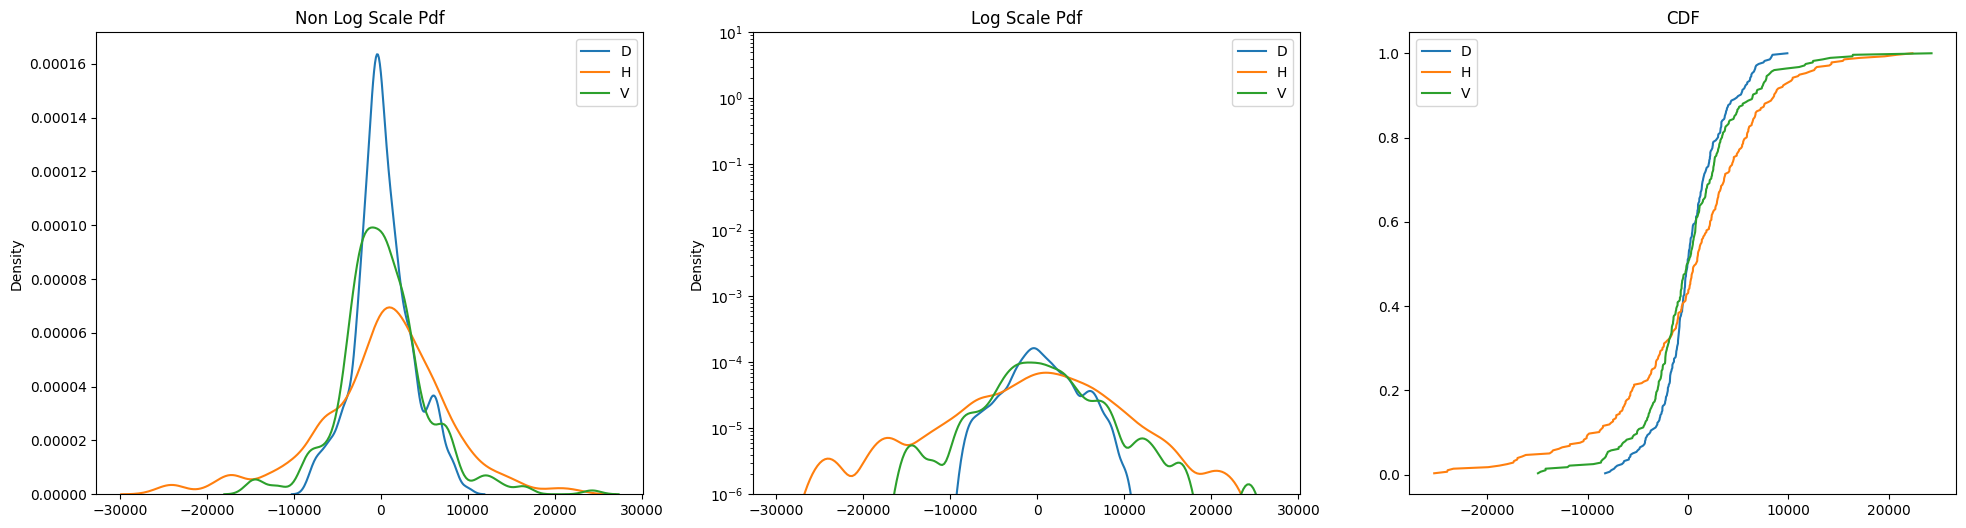

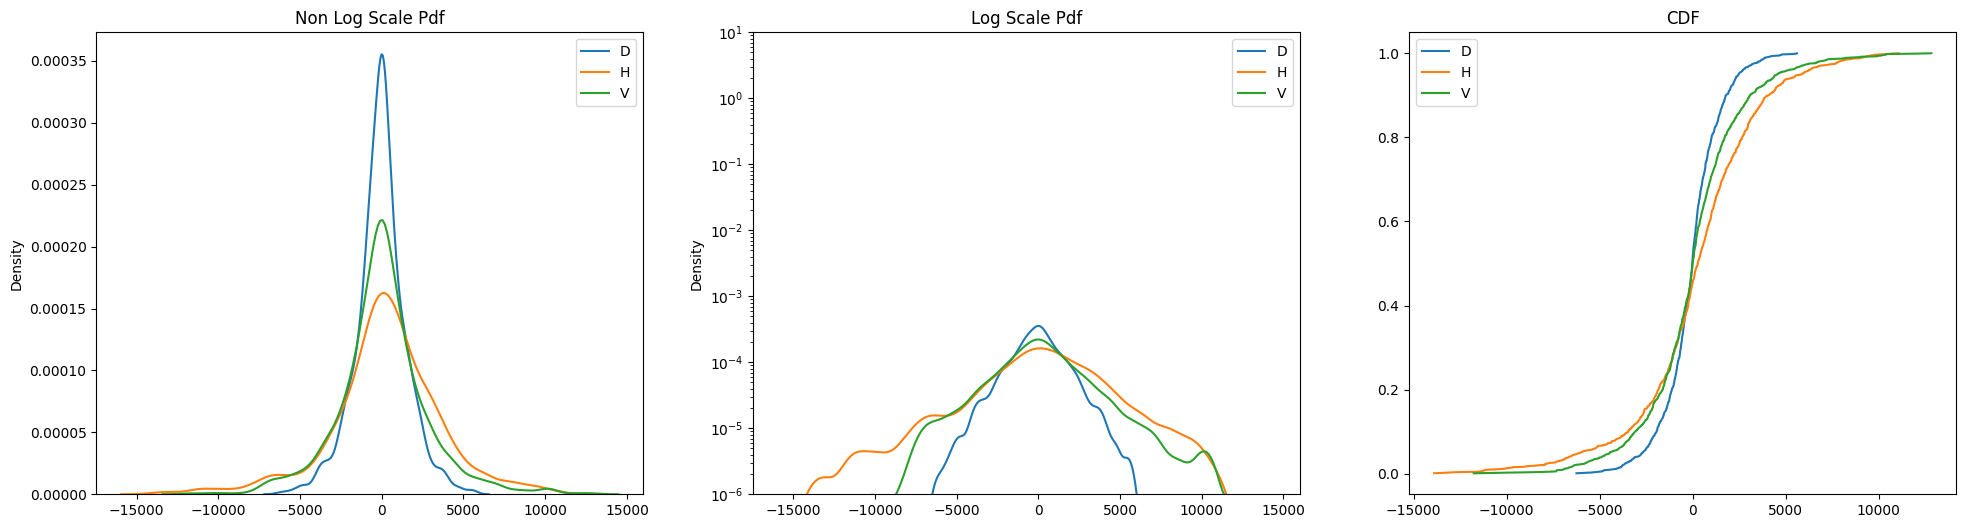

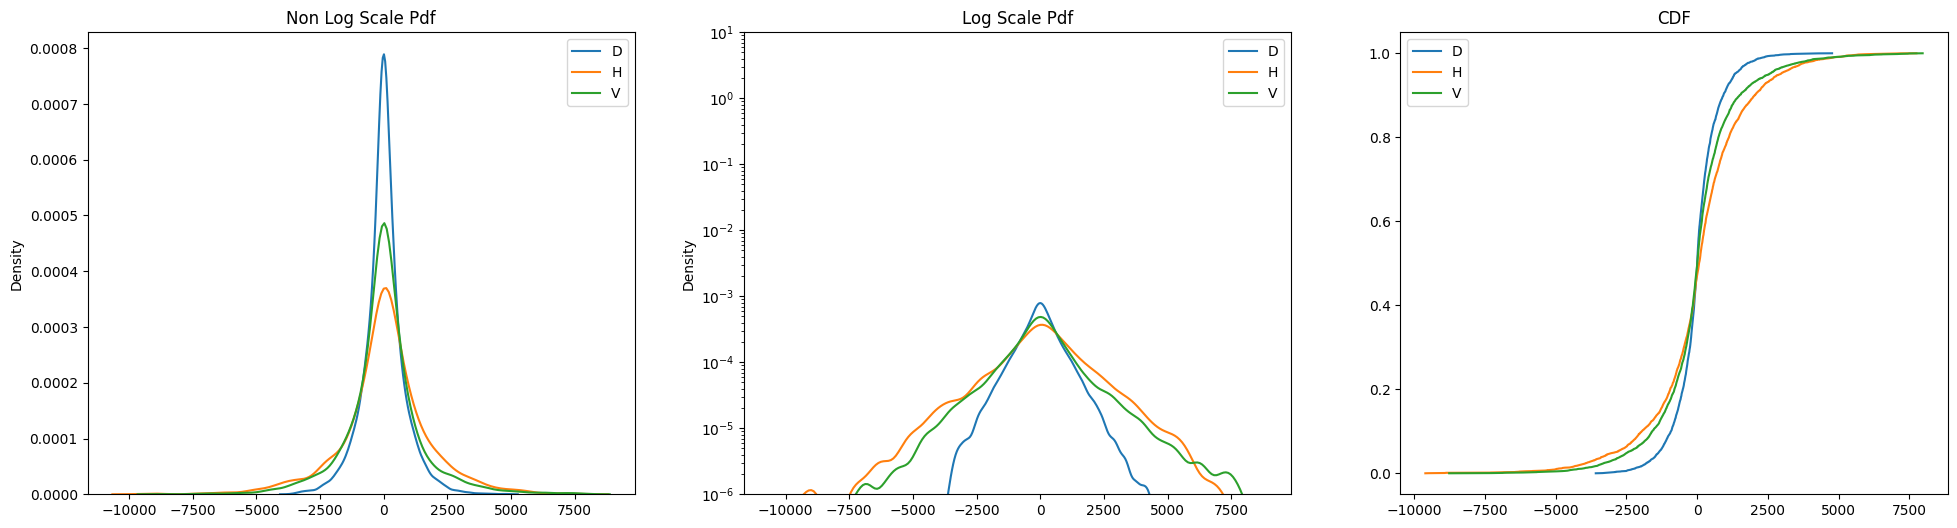

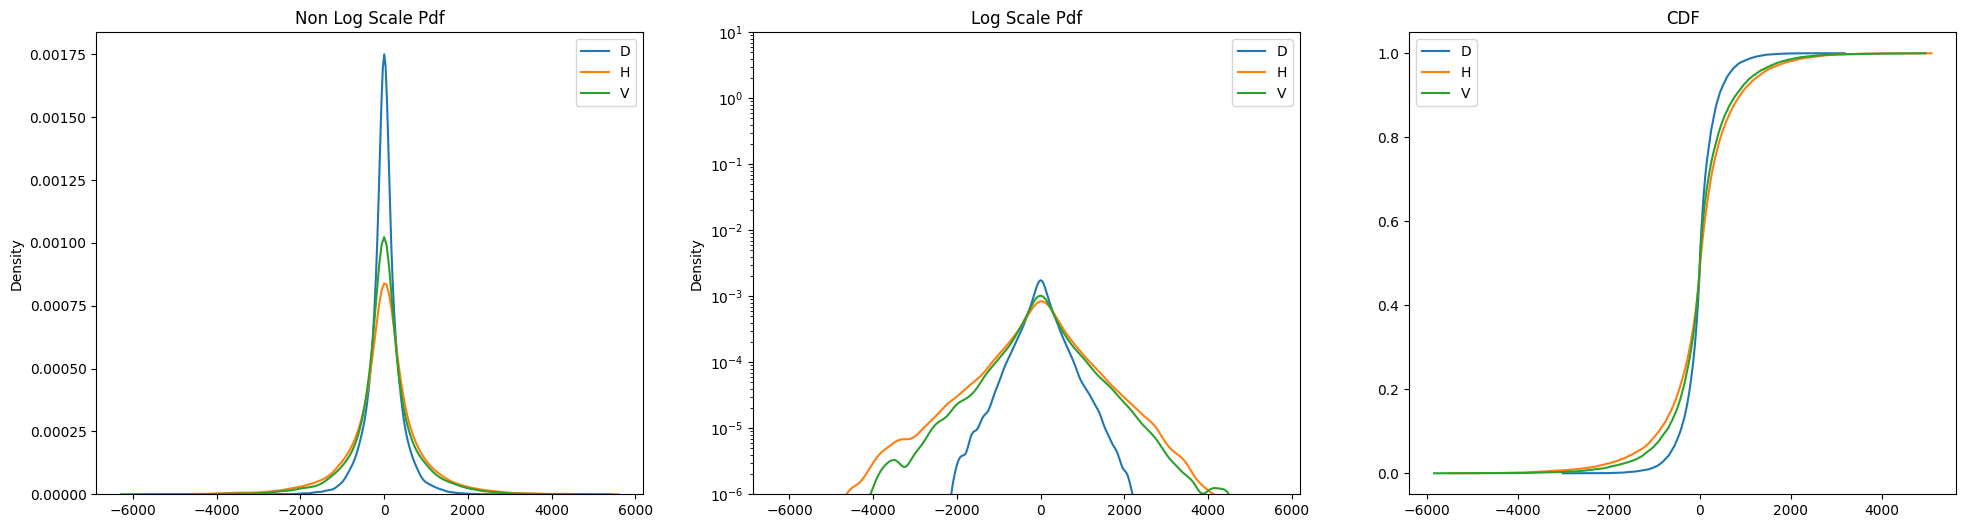

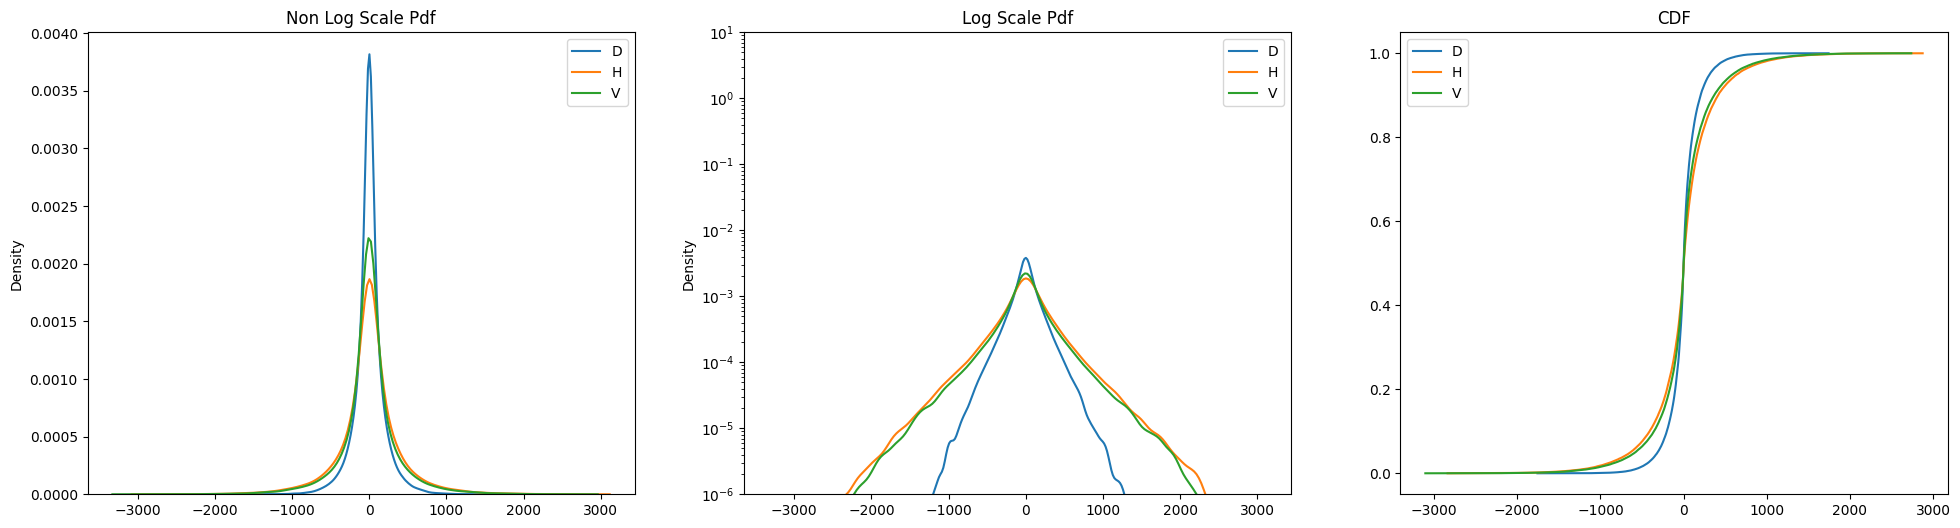

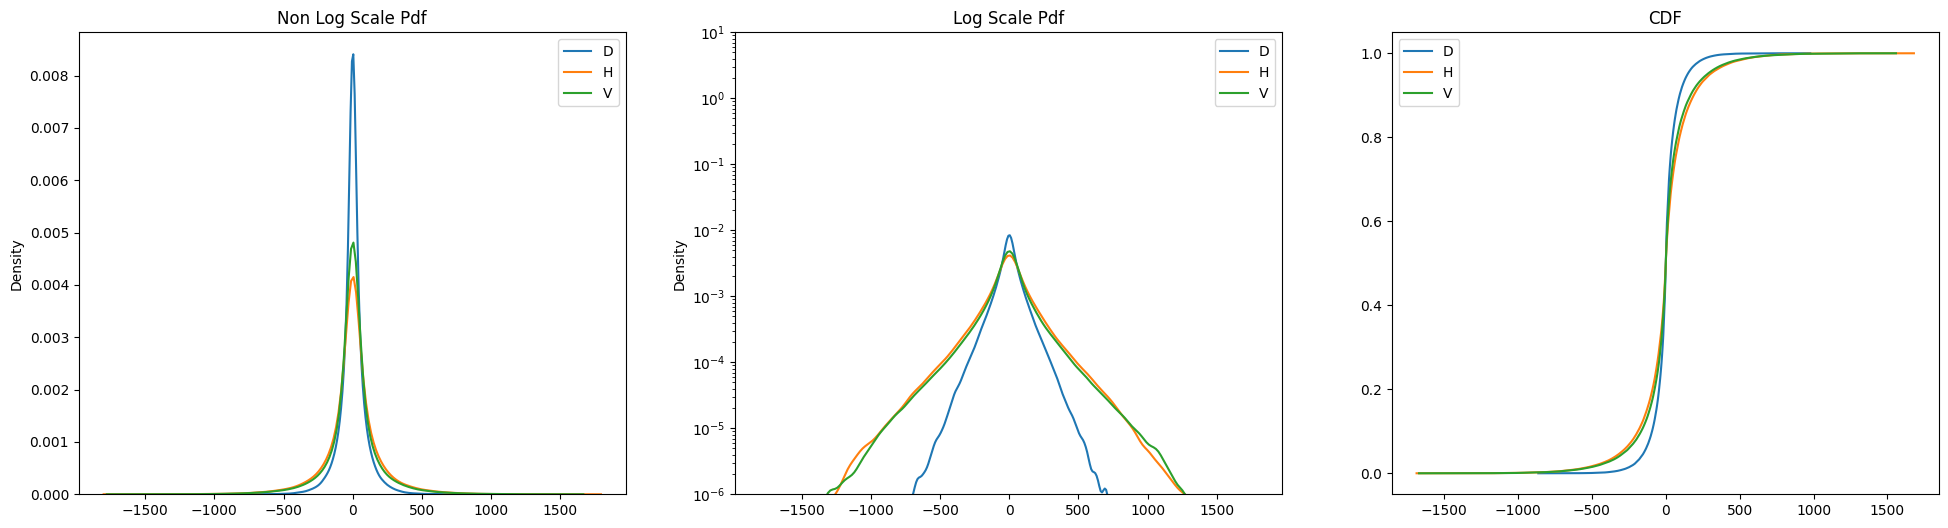

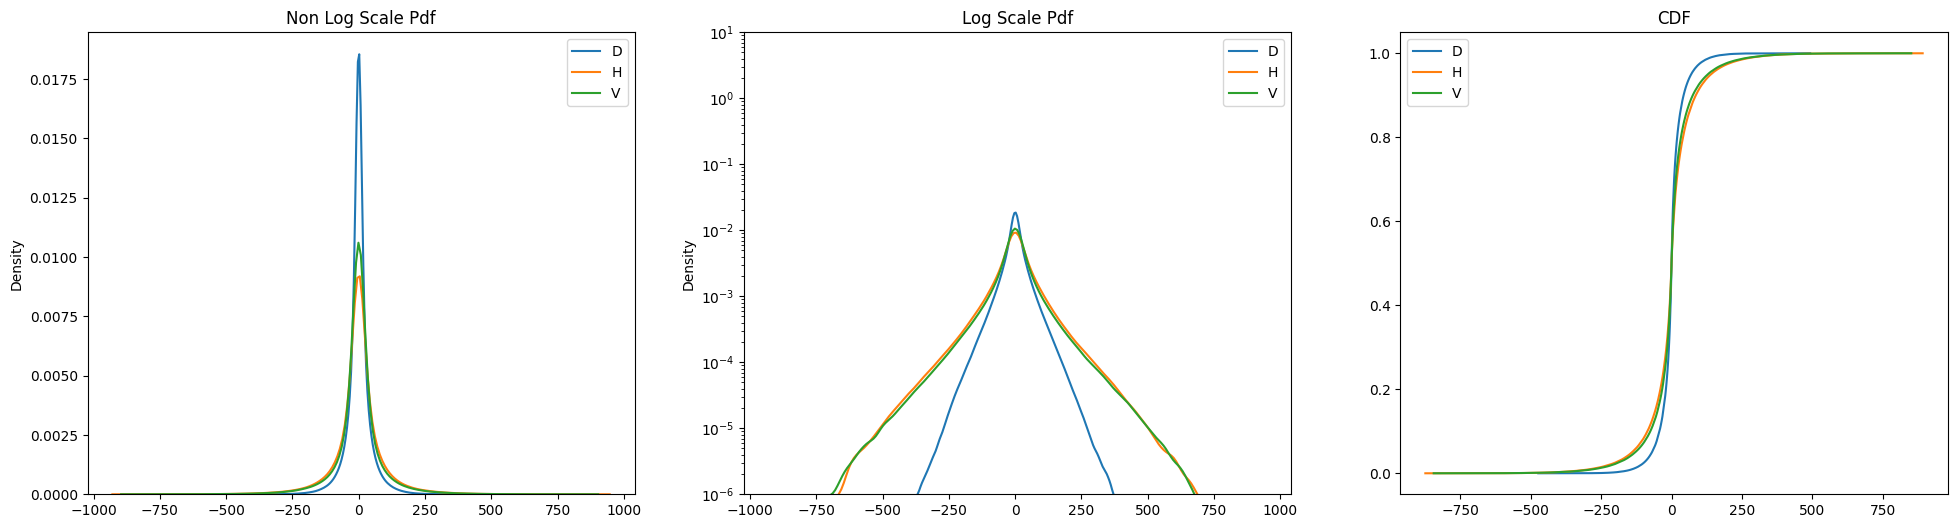

In [20]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

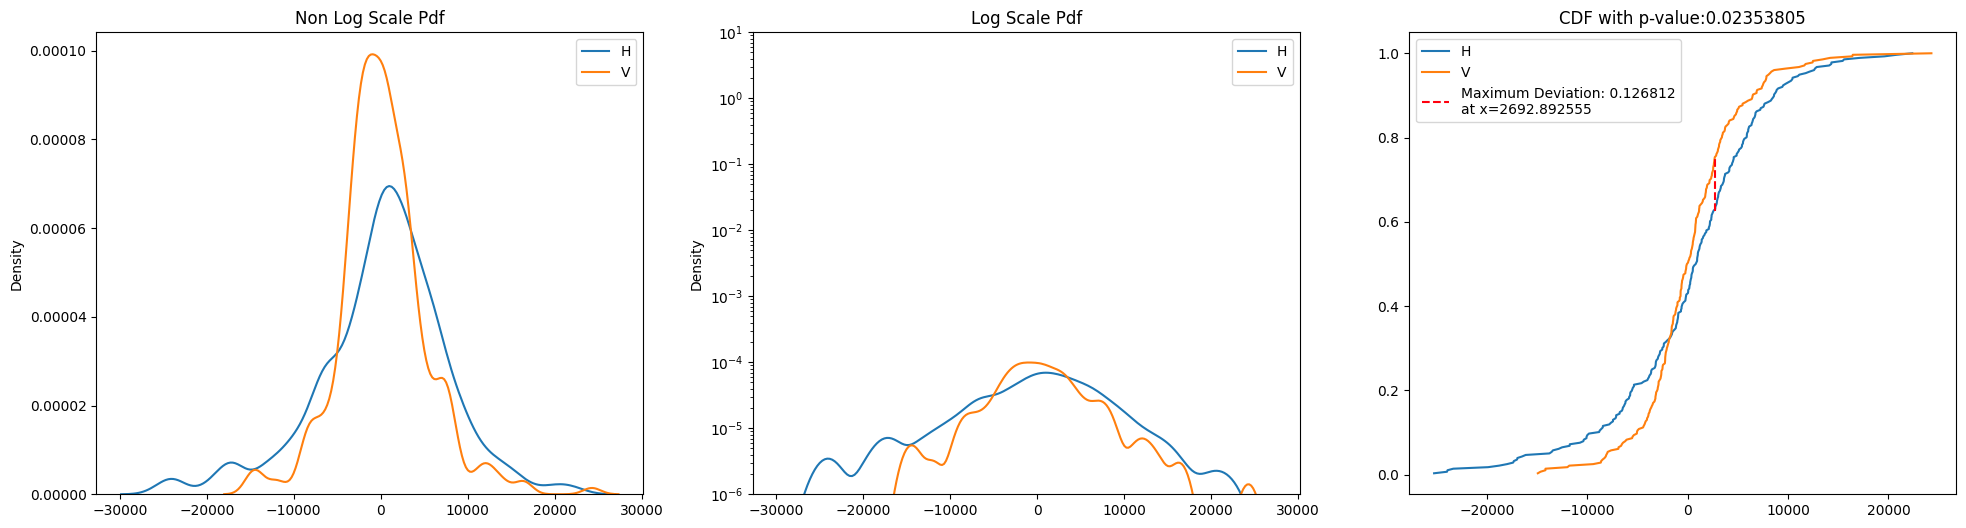

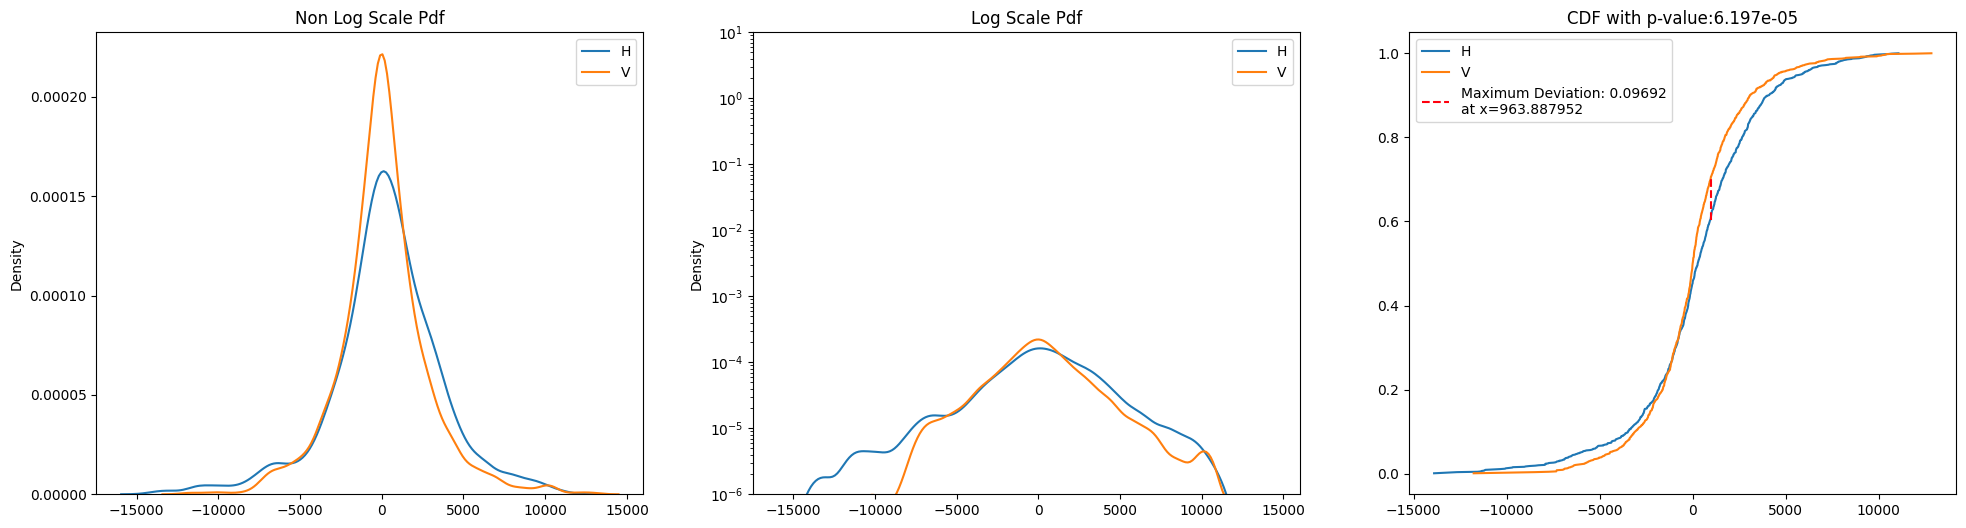

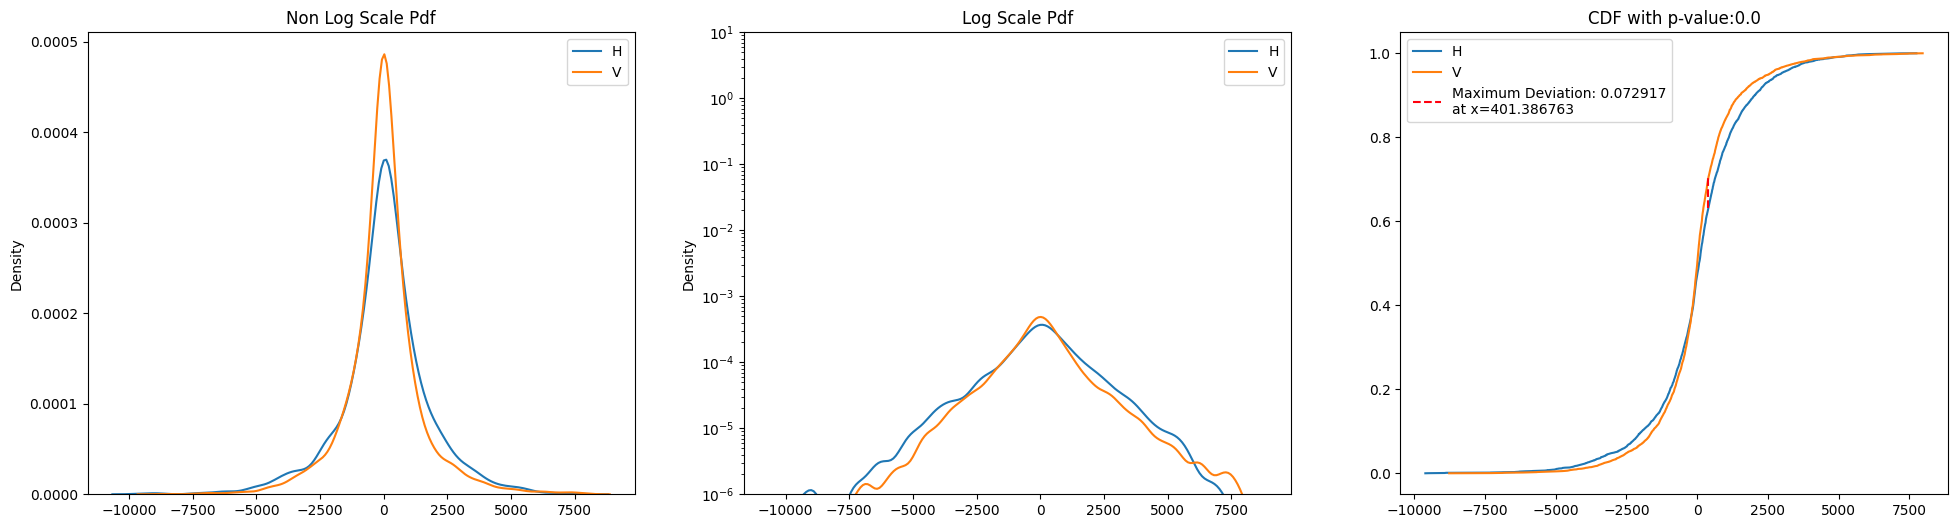

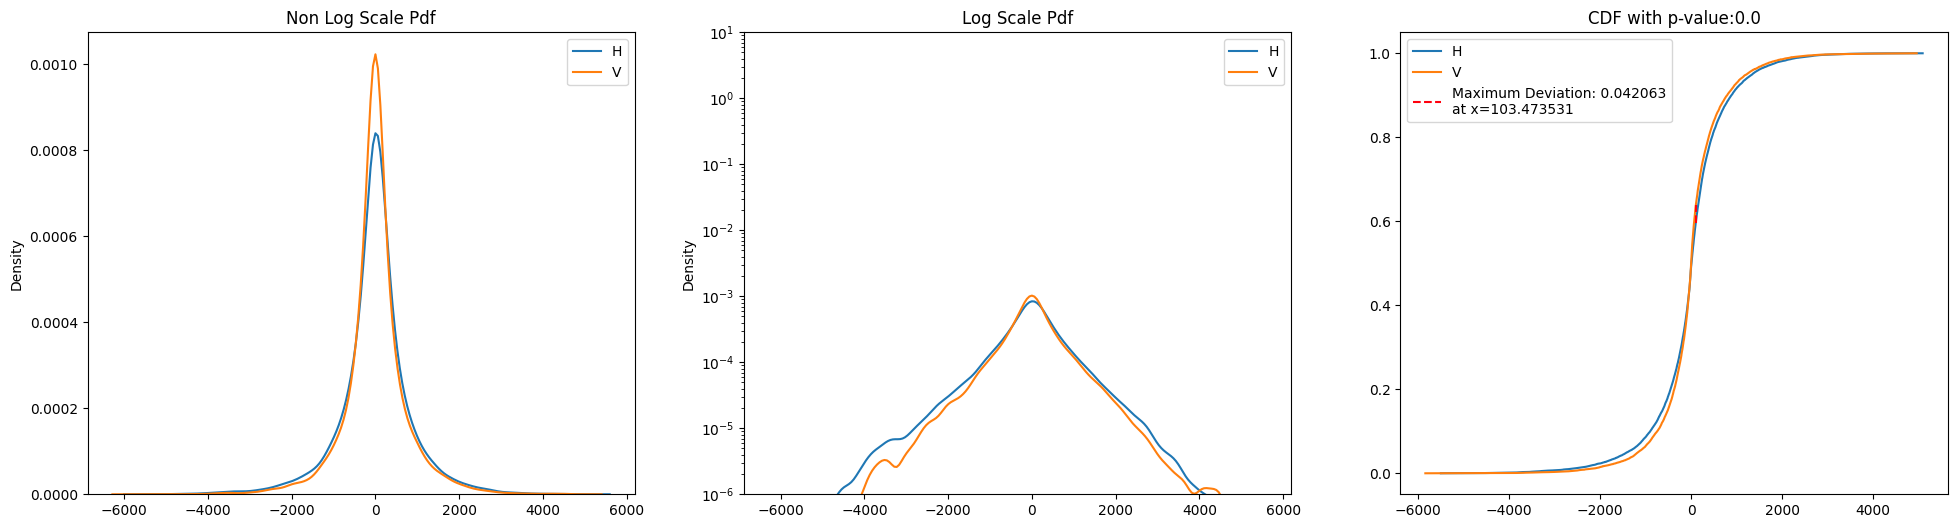

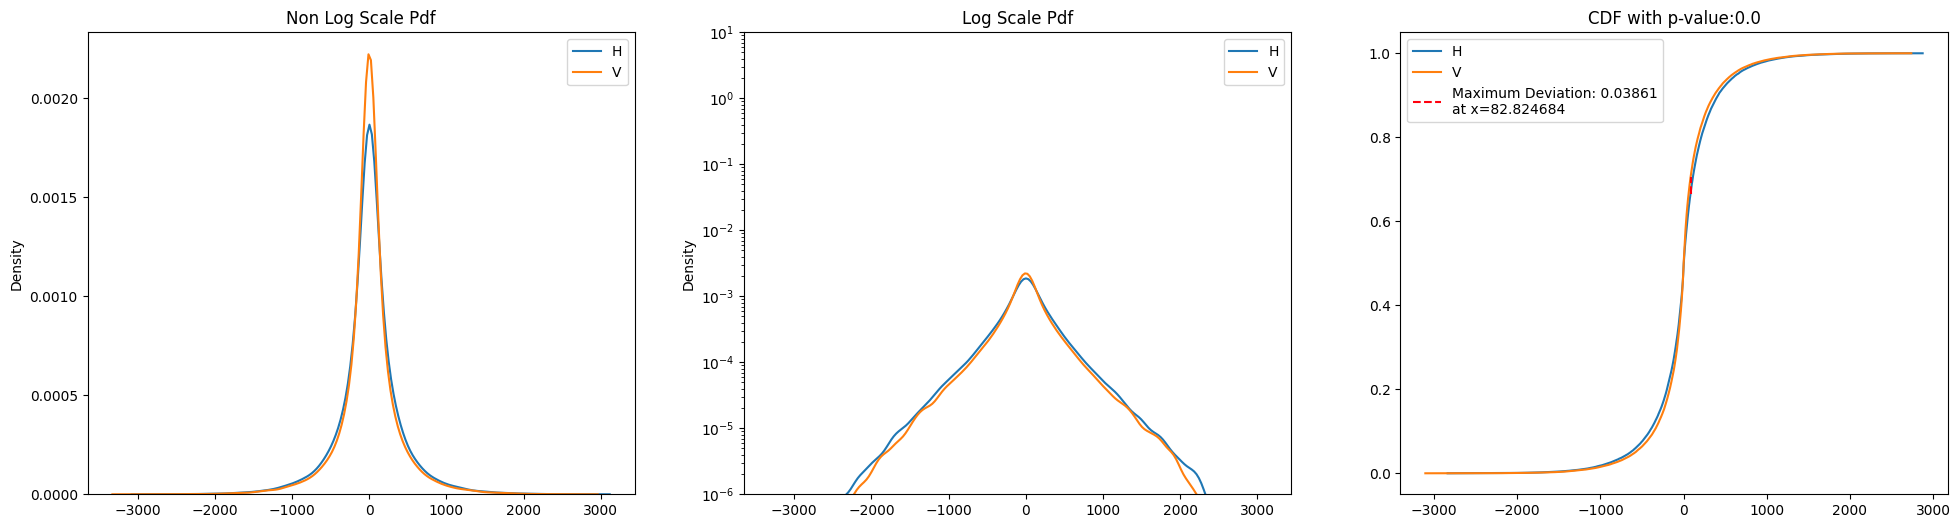

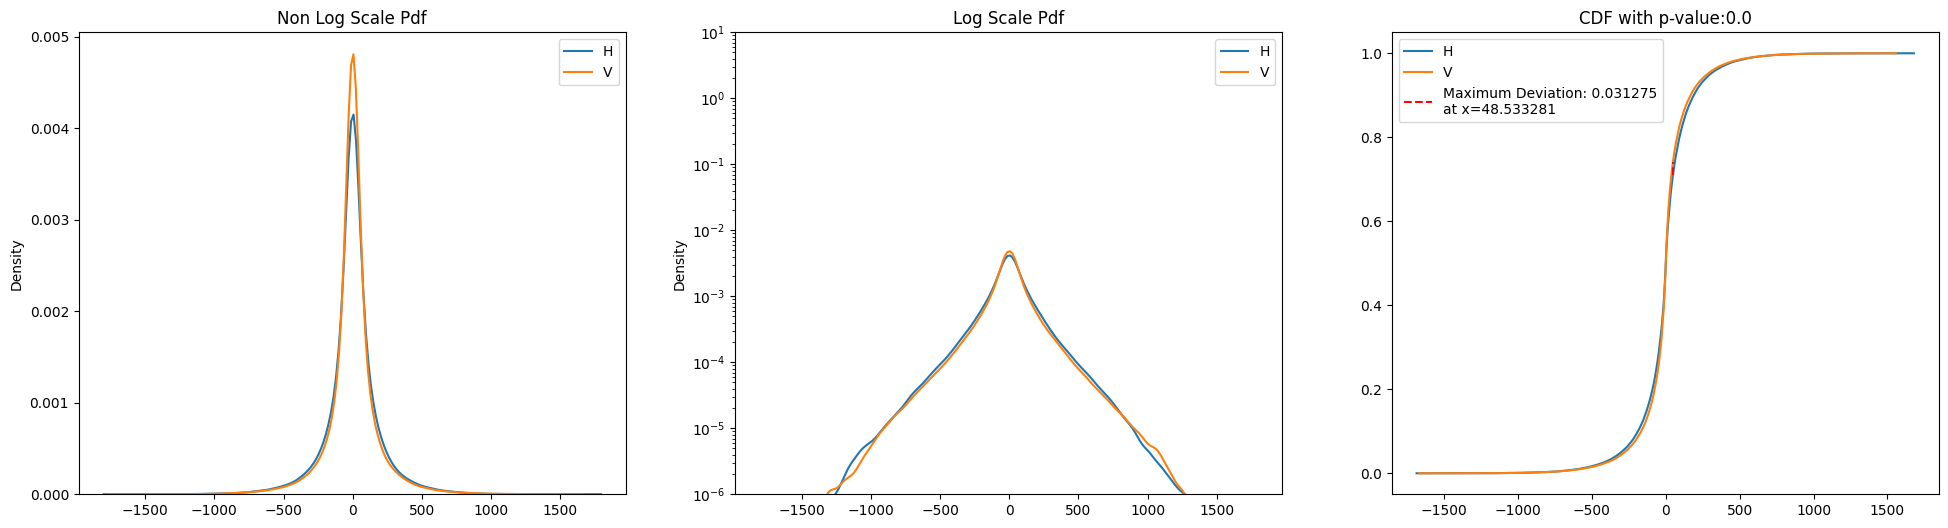

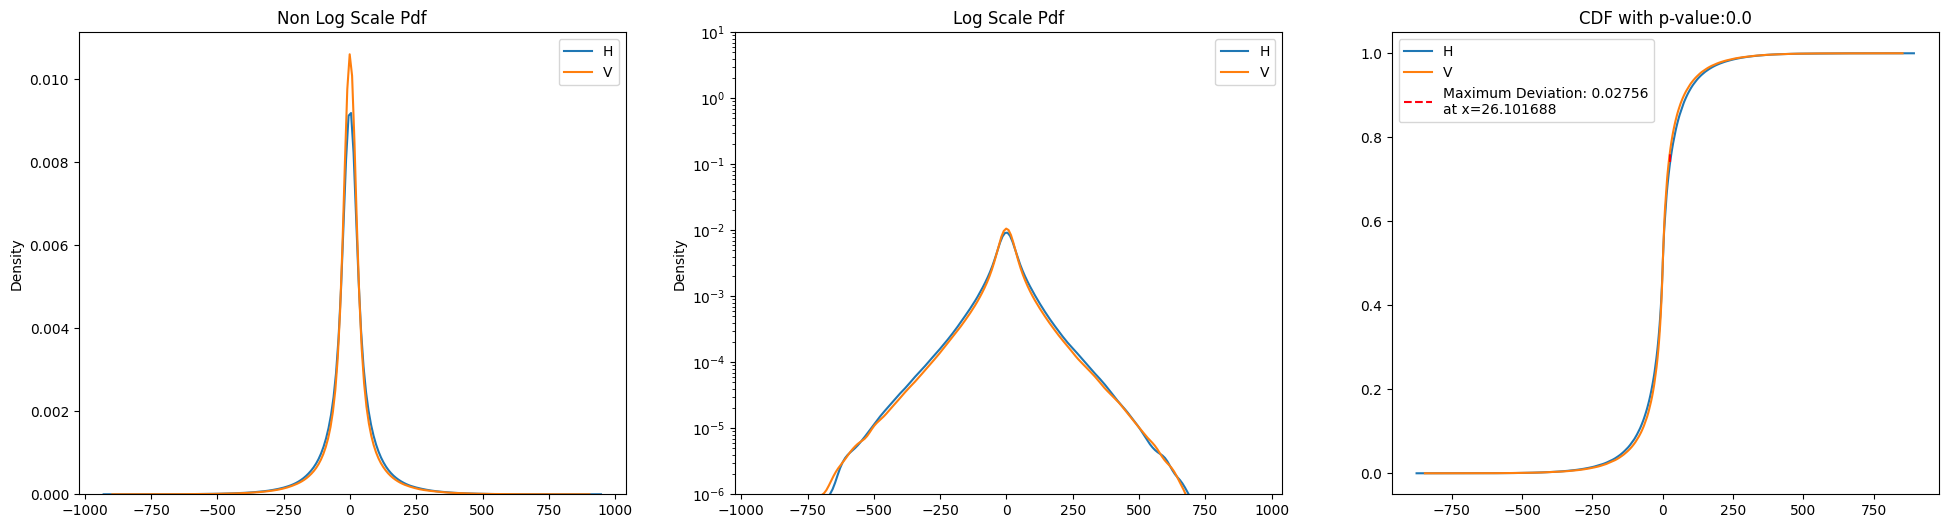

In [21]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

In [ ]:
red_df['Color'] = 'Red'
green_df['Color'] = 'Green'
blue_df['Color'] = 'Blue'


In [49]:
combined = pd.concat([red_df, green_df, blue_df])
combined

Layer First Second   KS_Stat    Pvalue Color
1      2     D      V  0.105072  0.094975   Red
2      2     H      V  0.134058  0.013941   Red
0      2     D      H  0.173913  0.000461   Red
2      3     H      V  0.093297  0.000133   Red
1      3     D      V  0.114130  0.000001   Red
..   ...   ...    ...       ...       ...   ...
1      7     D      V  0.070737  0.000000  Blue
0      7     D      H  0.097975  0.000000  Blue
2      8     H      V  0.028001  0.000000  Blue
1      8     D      V  0.068896  0.000000  Blue
0      8     D      H  0.094196  0.000000  Blue

[63 rows x 6 columns]

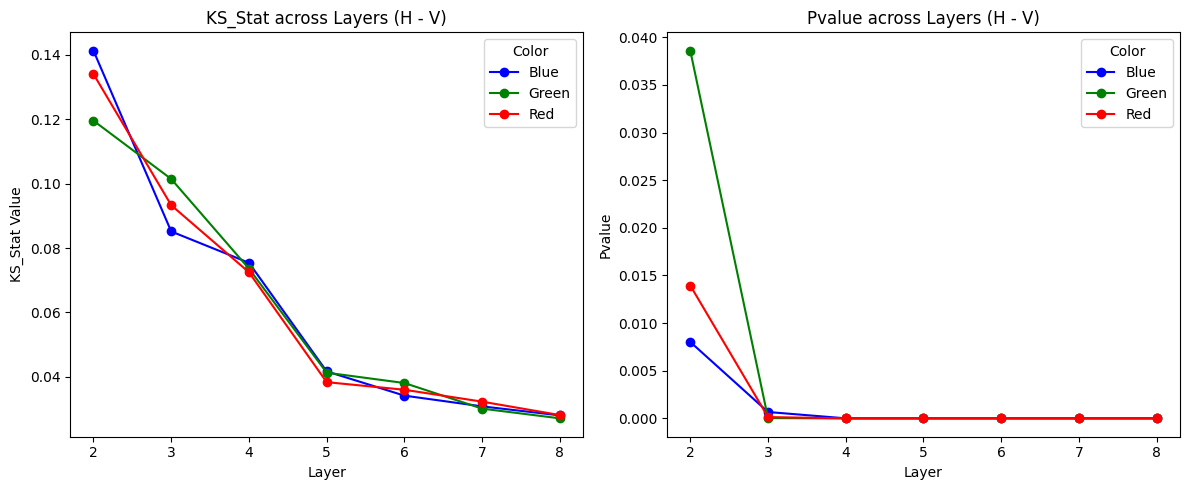

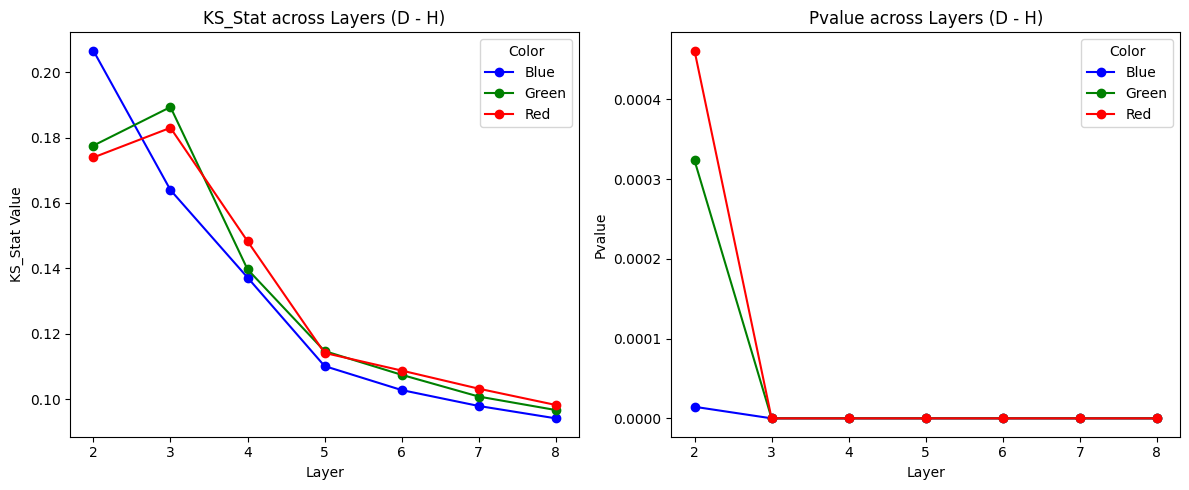

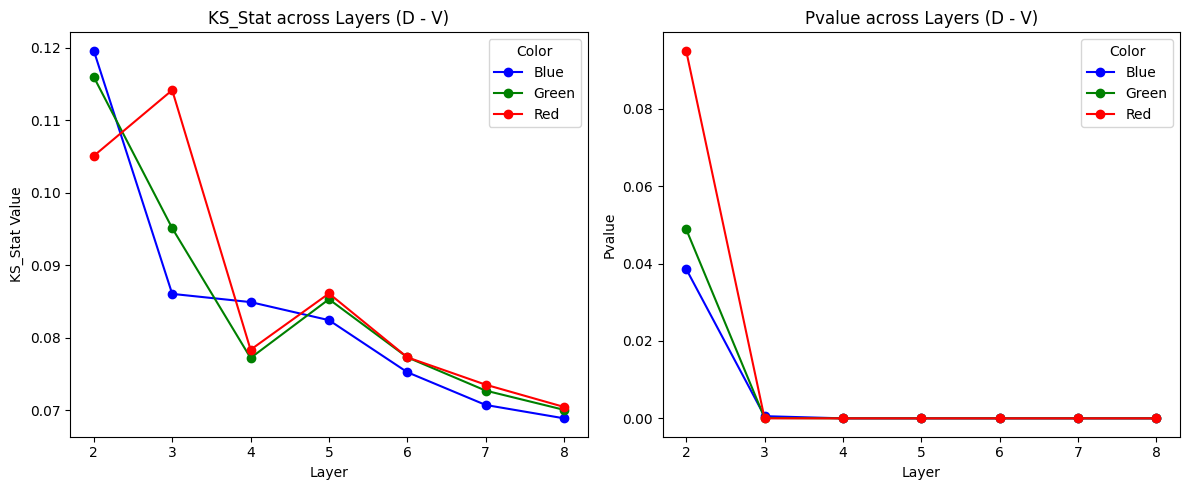

In [69]:
import matplotlib.pyplot as plt

# Define conditions
conditions = {
    "H - V": (combined['First'] == 'H') & (combined['Second'] == 'V'),
    "D - H": (combined['First'] == 'D') & (combined['Second'] == 'H'),
    "D - V": (combined['First'] == 'D') & (combined['Second'] == 'V')
}

# Define colors
color_dict = {'Red': 'red', 'Blue': 'blue', 'Green': 'green'}

# Iterate over each condition and create side-by-side plots
for title, condition in conditions.items():
    test = combined[condition]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # First plot - KS_Stat
    for category, group in test.groupby('Color'):
        axes[0].plot(group['Layer'], group['KS_Stat'], marker='o', label=category, color=color_dict.get(category, 'black'))

    axes[0].set_xlabel('Layer')
    axes[0].set_ylabel('KS_Stat Value')
    axes[0].set_title(f'KS_Stat across Layers ({title})')
    axes[0].legend(title="Color")

    # Second plot - Pvalue
    for category, group in test.groupby('Color'):
        axes[1].plot(group['Layer'], group['Pvalue'], marker='o', label=category, color=color_dict.get(category, 'black'))

    axes[1].set_xlabel('Layer')
    axes[1].set_ylabel('Pvalue')
    axes[1].set_title(f'Pvalue across Layers ({title})')
    axes[1].legend(title="Color")

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show each set of plots before moving to the next
    plt.show()
